## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Opening File to read

In [2]:
fileUrl = '/content/gdrive/MyDrive/Fiverr/Turkyajehni/3.TurkyaljehniClassification/'
df = pd.read_csv(fileUrl+'data.csv')

In [3]:
df

,Scenarios,Distance,Height,Section,Degree of inclination,Production output
0,scenario 1,20%,-70%,1.0,56,100%
1,scenario 2,20%,-60%,1.0,63,100%
2,scenario 3,20%,-50%,1.0,68,100%
3,scenario 4,20%,-40%,1.0,71,100%
4,scenario 5,20%,-30%,1.0,74,100%
...,...,...,...,...,...,...
1095,scenario 1096,200%,100%,0.2,30,95%
1096,scenario 1097,200%,150%,0.2,40,93%
1097,scenario 1098,200%,200%,0.2,47,92%
1098,scenario 1099,200%,250%,0.2,53,91%


## Delete Attributes not Required

In [4]:
del df['Scenarios']

## Removing % sign from data

In [5]:
df['Production output'] = pd.to_numeric(df['Production output'].str.replace('%', ''))
df['Distance'] = pd.to_numeric(df['Distance'].str.replace('%', ''))
df['Height'] = pd.to_numeric(df['Height'].str.replace('%', ''))

In [6]:
df['Production output'].unique()

array([100,  97,  89,  73,  57,  51,  48,  46,  45,  44,  43,  98,  95,
        93,  81,  69,  65,  64,  63,  62,  61,  67,  66,  99,  94,  91,
        86,  82,  79,  78,  76,  75,  74,  72,  71,  77,  96,  92,  88,
        84,  83,  80,  87,  85,  90])

# Making Production Output Categorical

In [7]:
df['Output'] = pd.cut(df['Production output'],bins=[40,50,60,70,80,90,100],labels=['41 to 50','51 to 60','61 to 70','71 to 80','81 to 90','91 to 100'])

In [8]:
df.sample(10)

,Distance,Height,Section,Degree of inclination,Production output,Output
598,120,-30,0.6,14,98,91 to 100
549,100,300,0.2,72,82,81 to 90
493,100,20,0.6,38,95,91 to 100
907,180,-20,0.8,18,100,91 to 100
330,80,-70,1.0,20,100,91 to 100
992,200,-50,1.0,14,100,91 to 100
988,180,250,0.2,56,90,81 to 90
875,160,100,0.2,36,91,91 to 100
912,180,30,0.8,31,98,91 to 100
127,40,100,1.0,78,62,61 to 70


In [9]:
df['Output'].unique()

['91 to 100', '81 to 90', '71 to 80', '51 to 60', '41 to 50', '61 to 70']
Categories (6, object): ['41 to 50' < '51 to 60' < '61 to 70' < '71 to 80' < '81 to 90' < '91 to 100']

## Details of Data Set

In [10]:
df.describe(include='all')

,Distance,Height,Section,Degree of inclination,Production output,Output
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100
unique,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,91 to 100
freq,NaN,NaN,NaN,NaN,NaN,678
mean,110.000000,53.181818,0.600000,47.723636,87.085455,NaN
std,57.471756,96.639926,0.282971,22.339143,15.774687,NaN
min,20.000000,-70.000000,0.200000,2.000000,43.000000,NaN
25%,60.000000,-20.000000,0.400000,29.000000,82.000000,NaN
50%,110.000000,35.000000,0.600000,51.000000,95.000000,NaN
75%,160.000000,90.000000,0.800000,65.000000,97.000000,NaN


In [11]:
df['Degree of inclination'].value_counts()


65    129
26     48
45     39
56     29
63     24
     ... 
2       4
37      4
55      4
84      4
87      1
Name: Degree of inclination, Length: 82, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Distance               1100 non-null   int64   
 1   Height                 1100 non-null   int64   
 2   Section                1100 non-null   float64 
 3   Degree of inclination  1100 non-null   int64   
 4   Production output      1100 non-null   int64   
 5   Output                 1100 non-null   category
dtypes: category(1), float64(1), int64(4)
memory usage: 44.4 KB


#Plots

## Histogram and Probablity Plot

<Figure size 7200x4800 with 0 Axes>

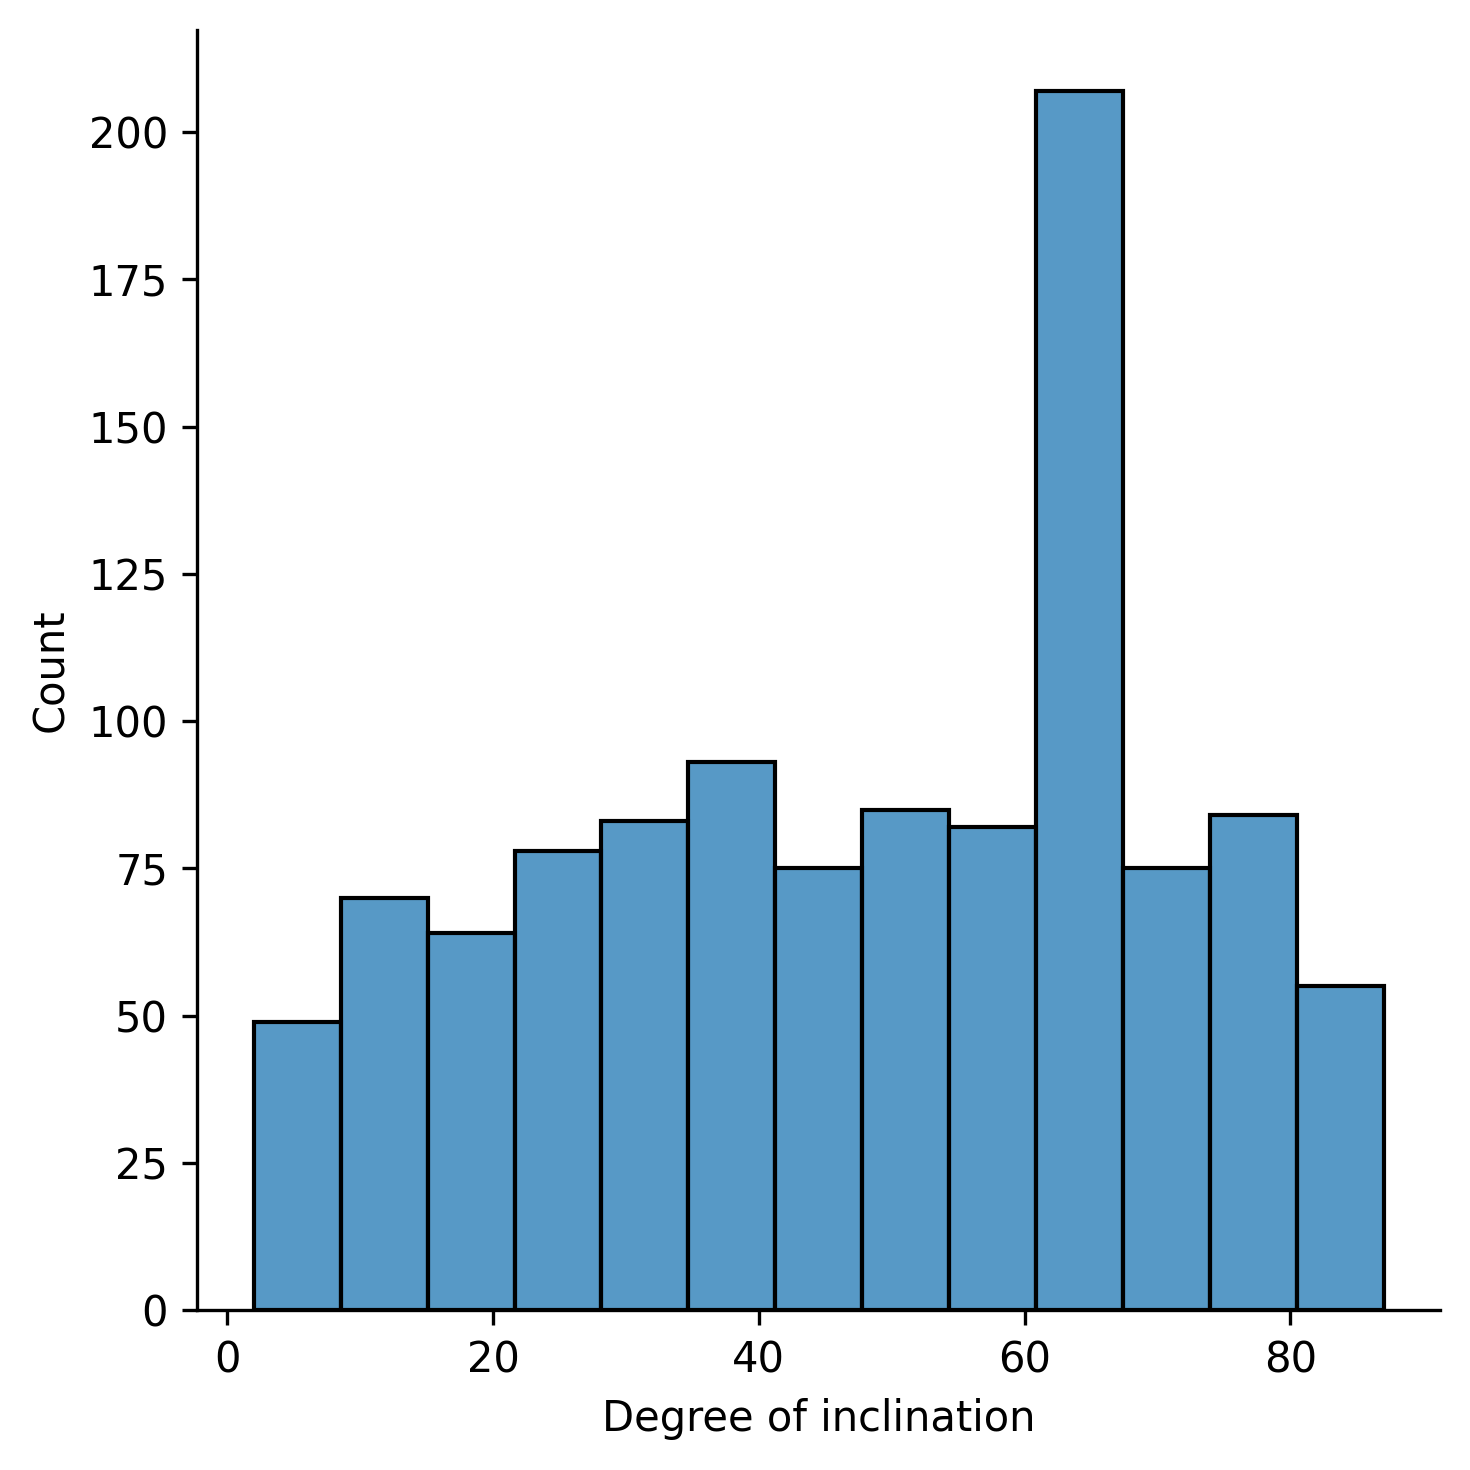

In [34]:
plt.figure(dpi=1200)
sns.displot(df, x='Degree of inclination')

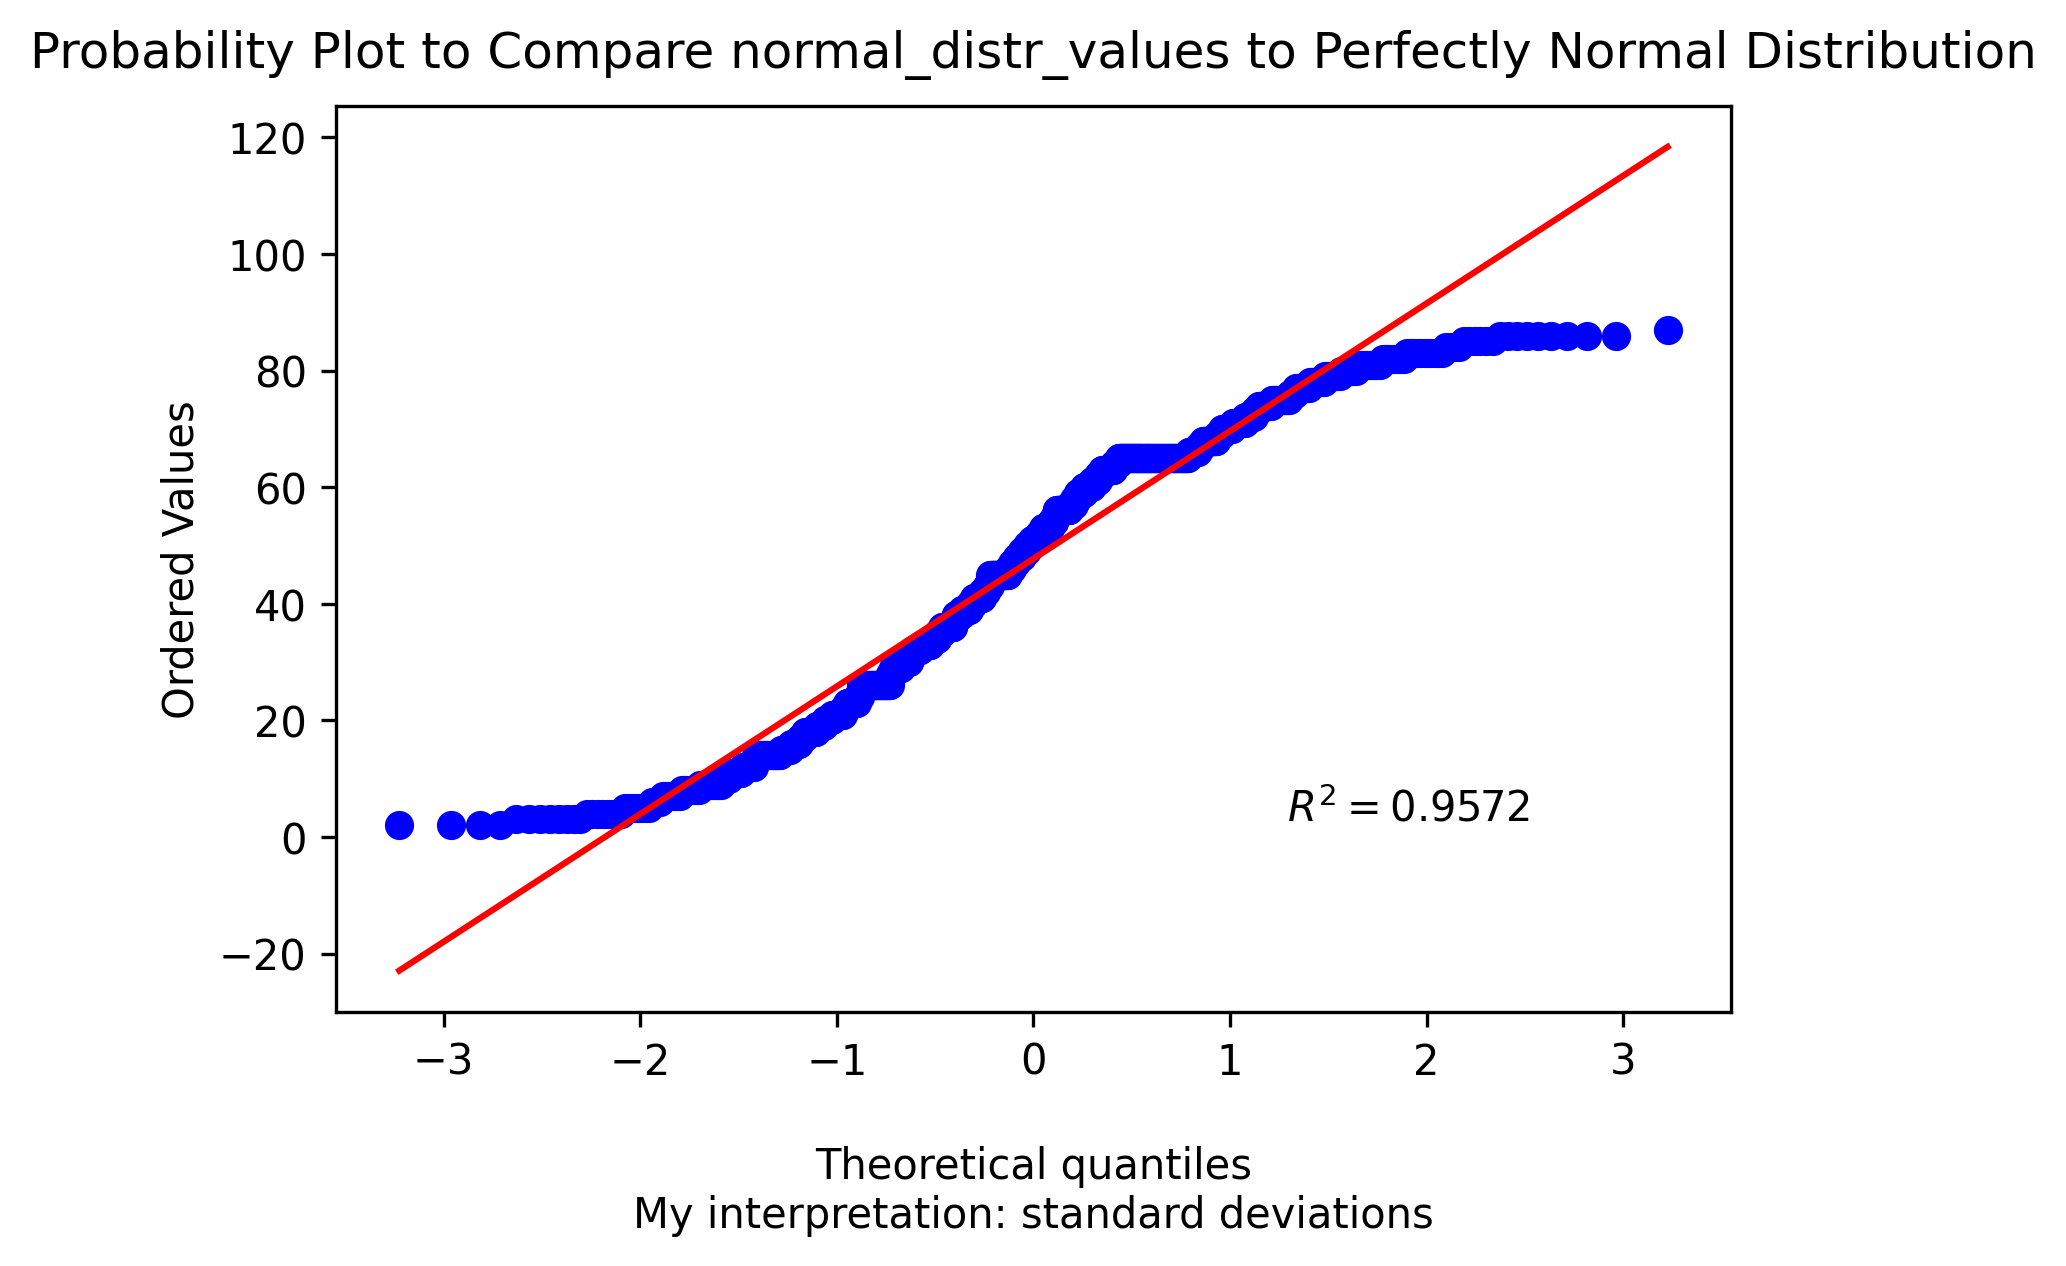

In [35]:
import scipy.stats as stats
stats.probplot(df.loc[:,'Degree of inclination'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
plt.show()

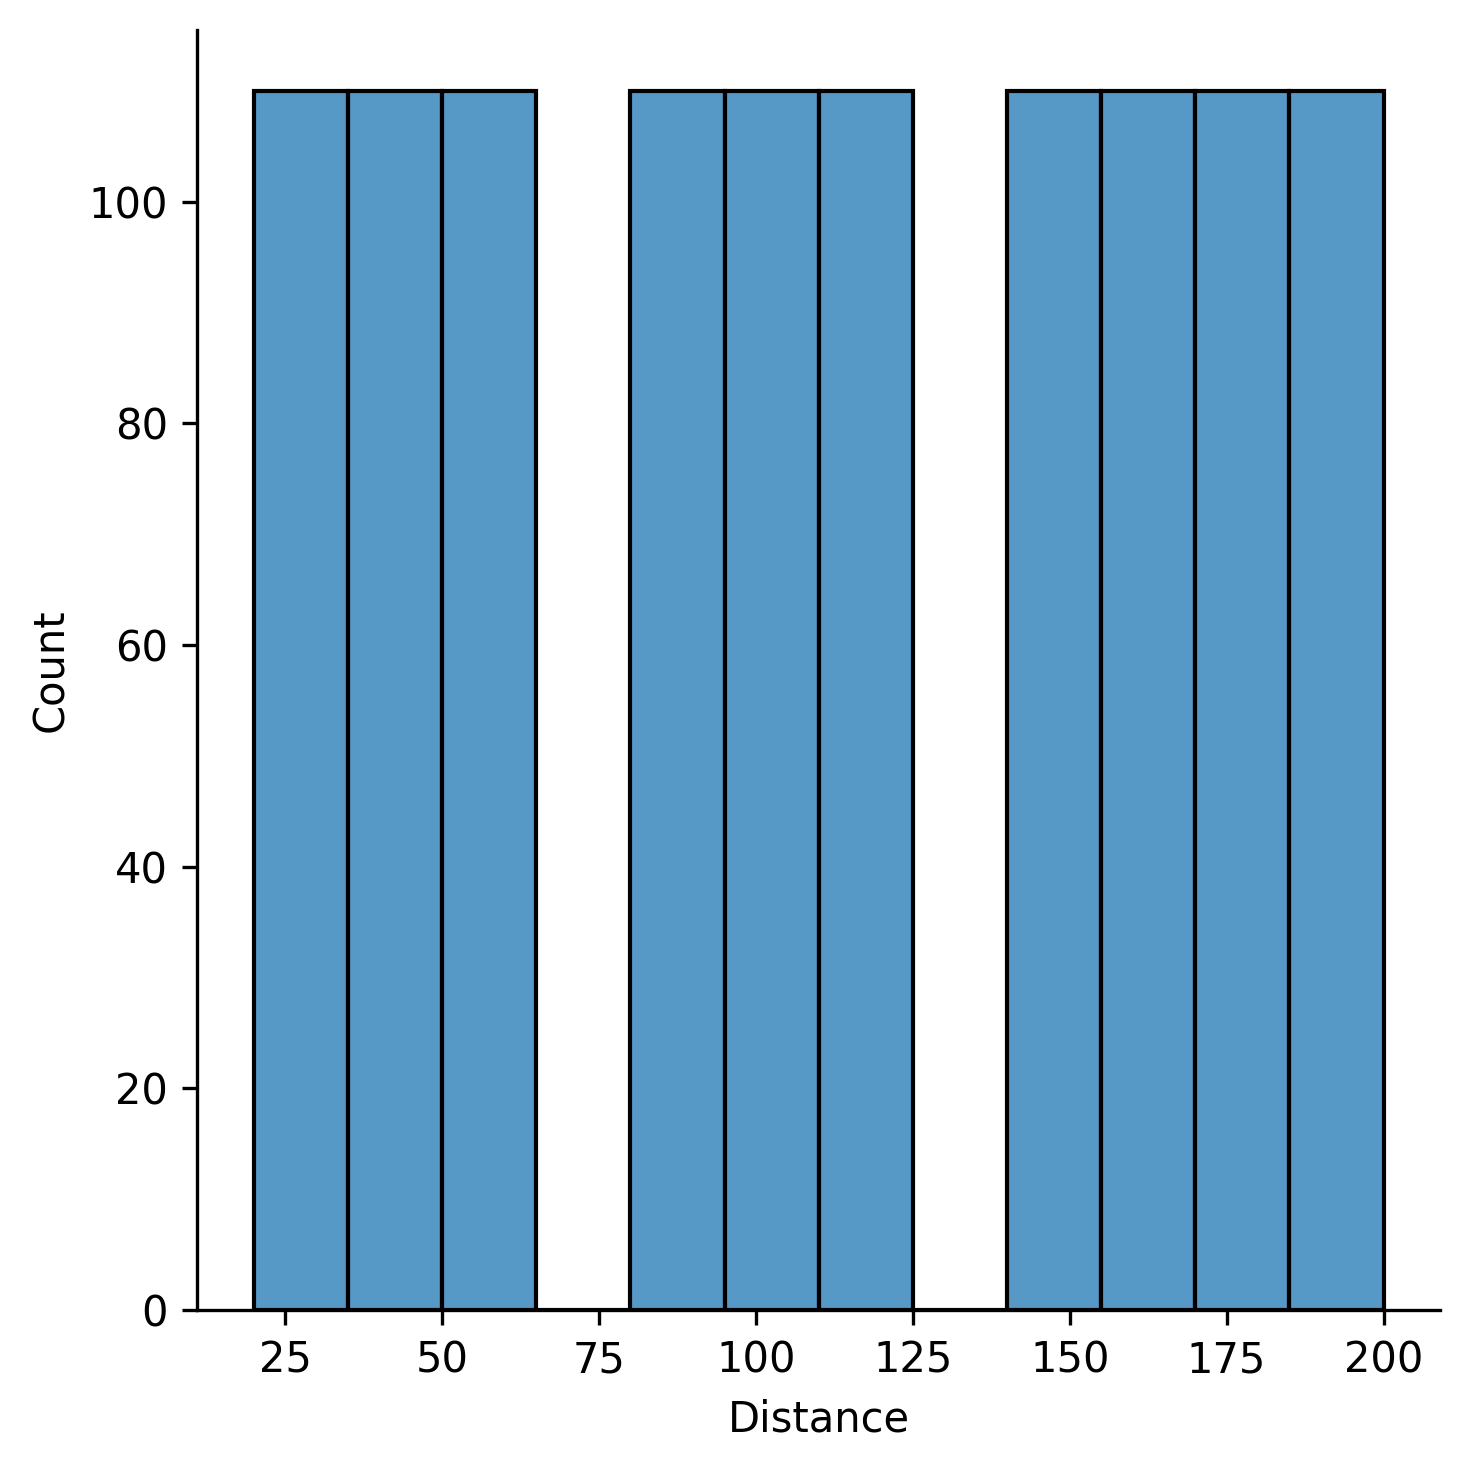

In [36]:
sns.displot(df, x='Distance')

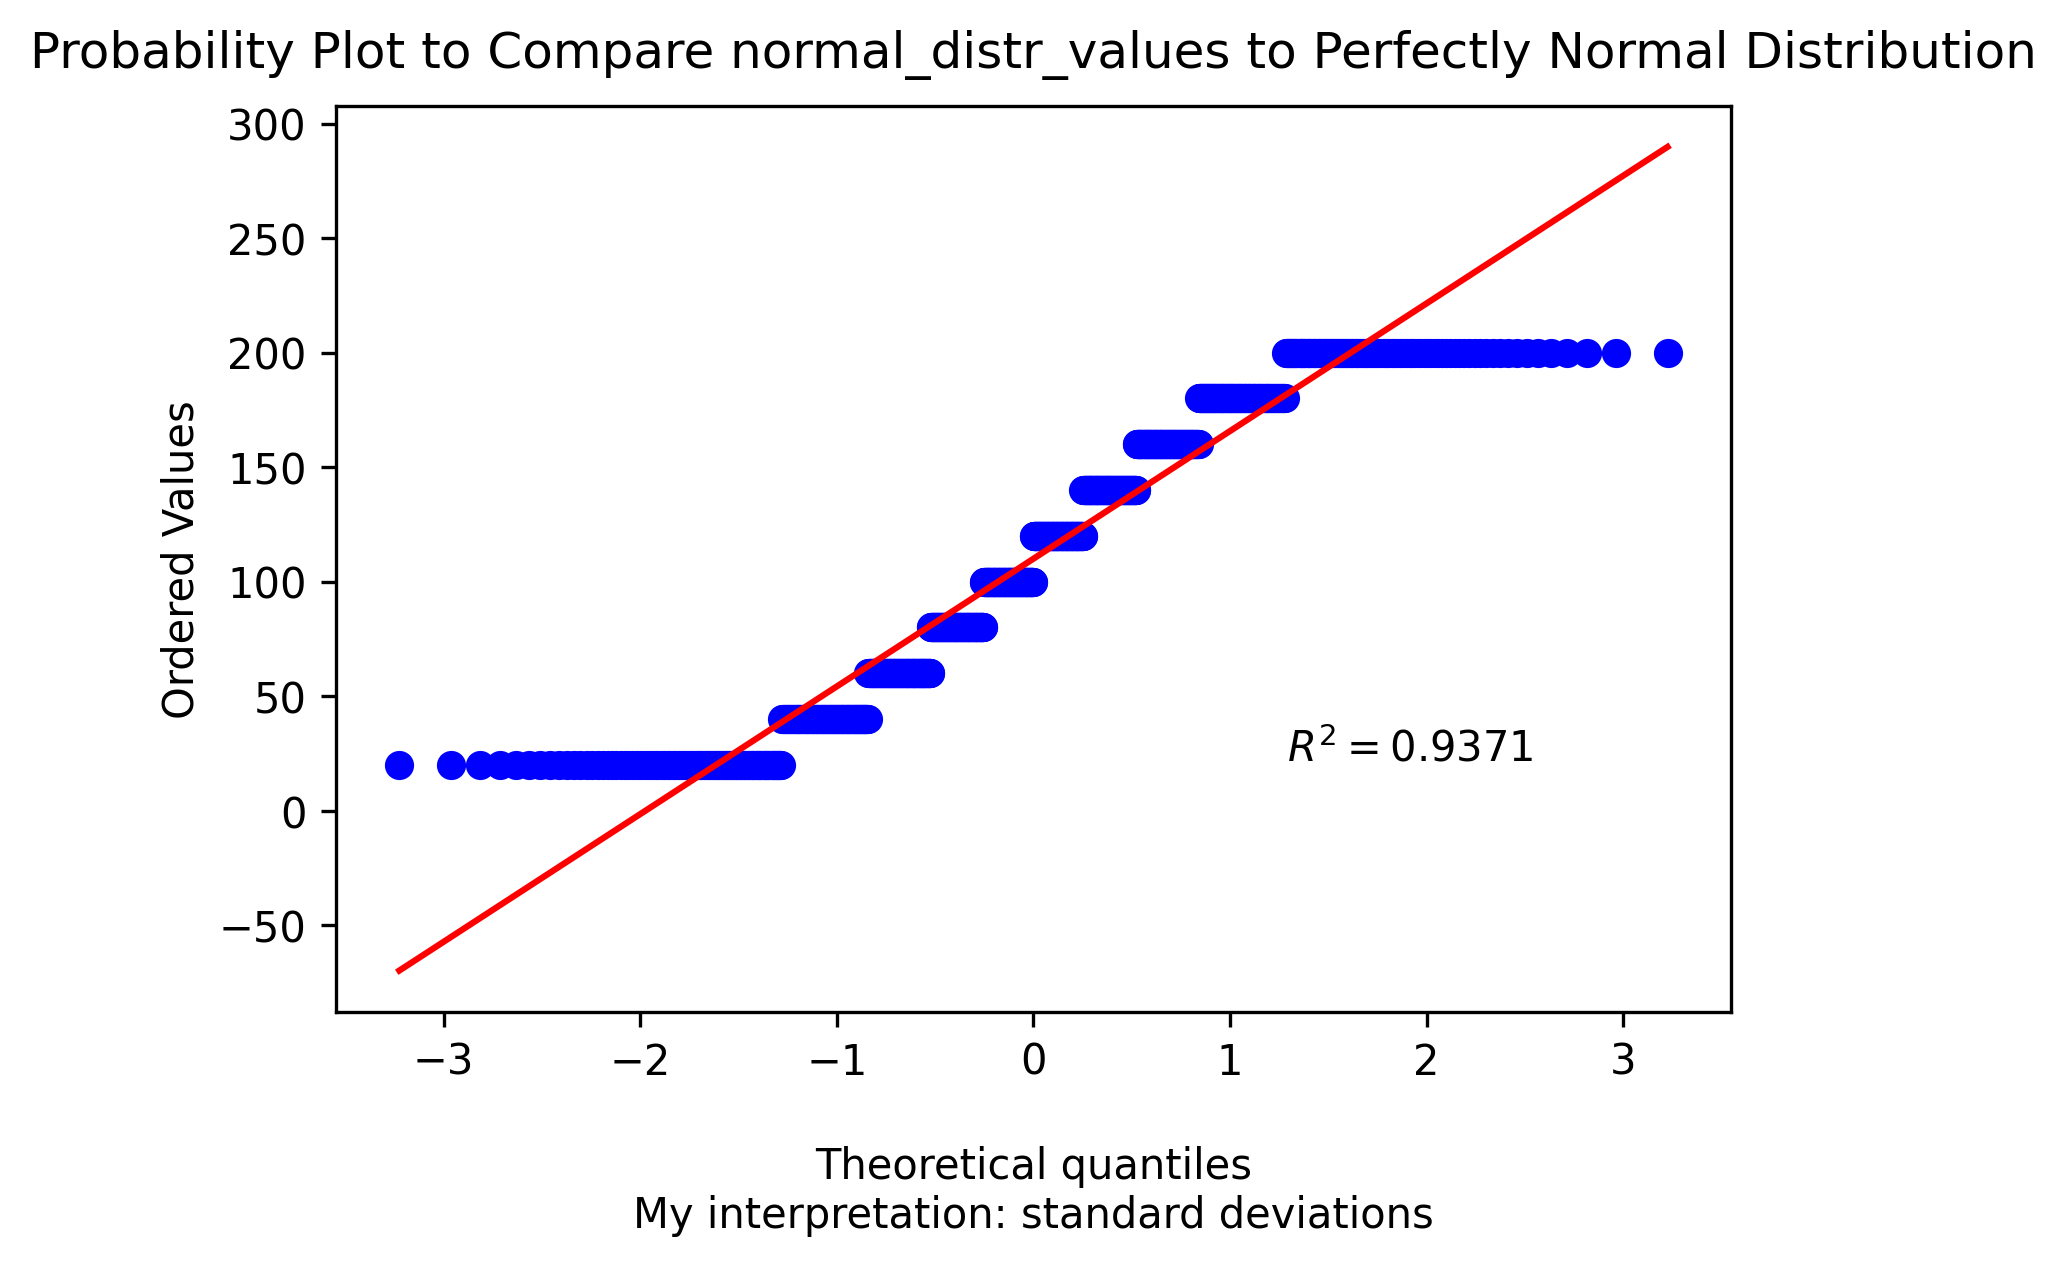

In [37]:
import scipy.stats as stats
stats.probplot(df.loc[:,'Distance'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
plt.show()

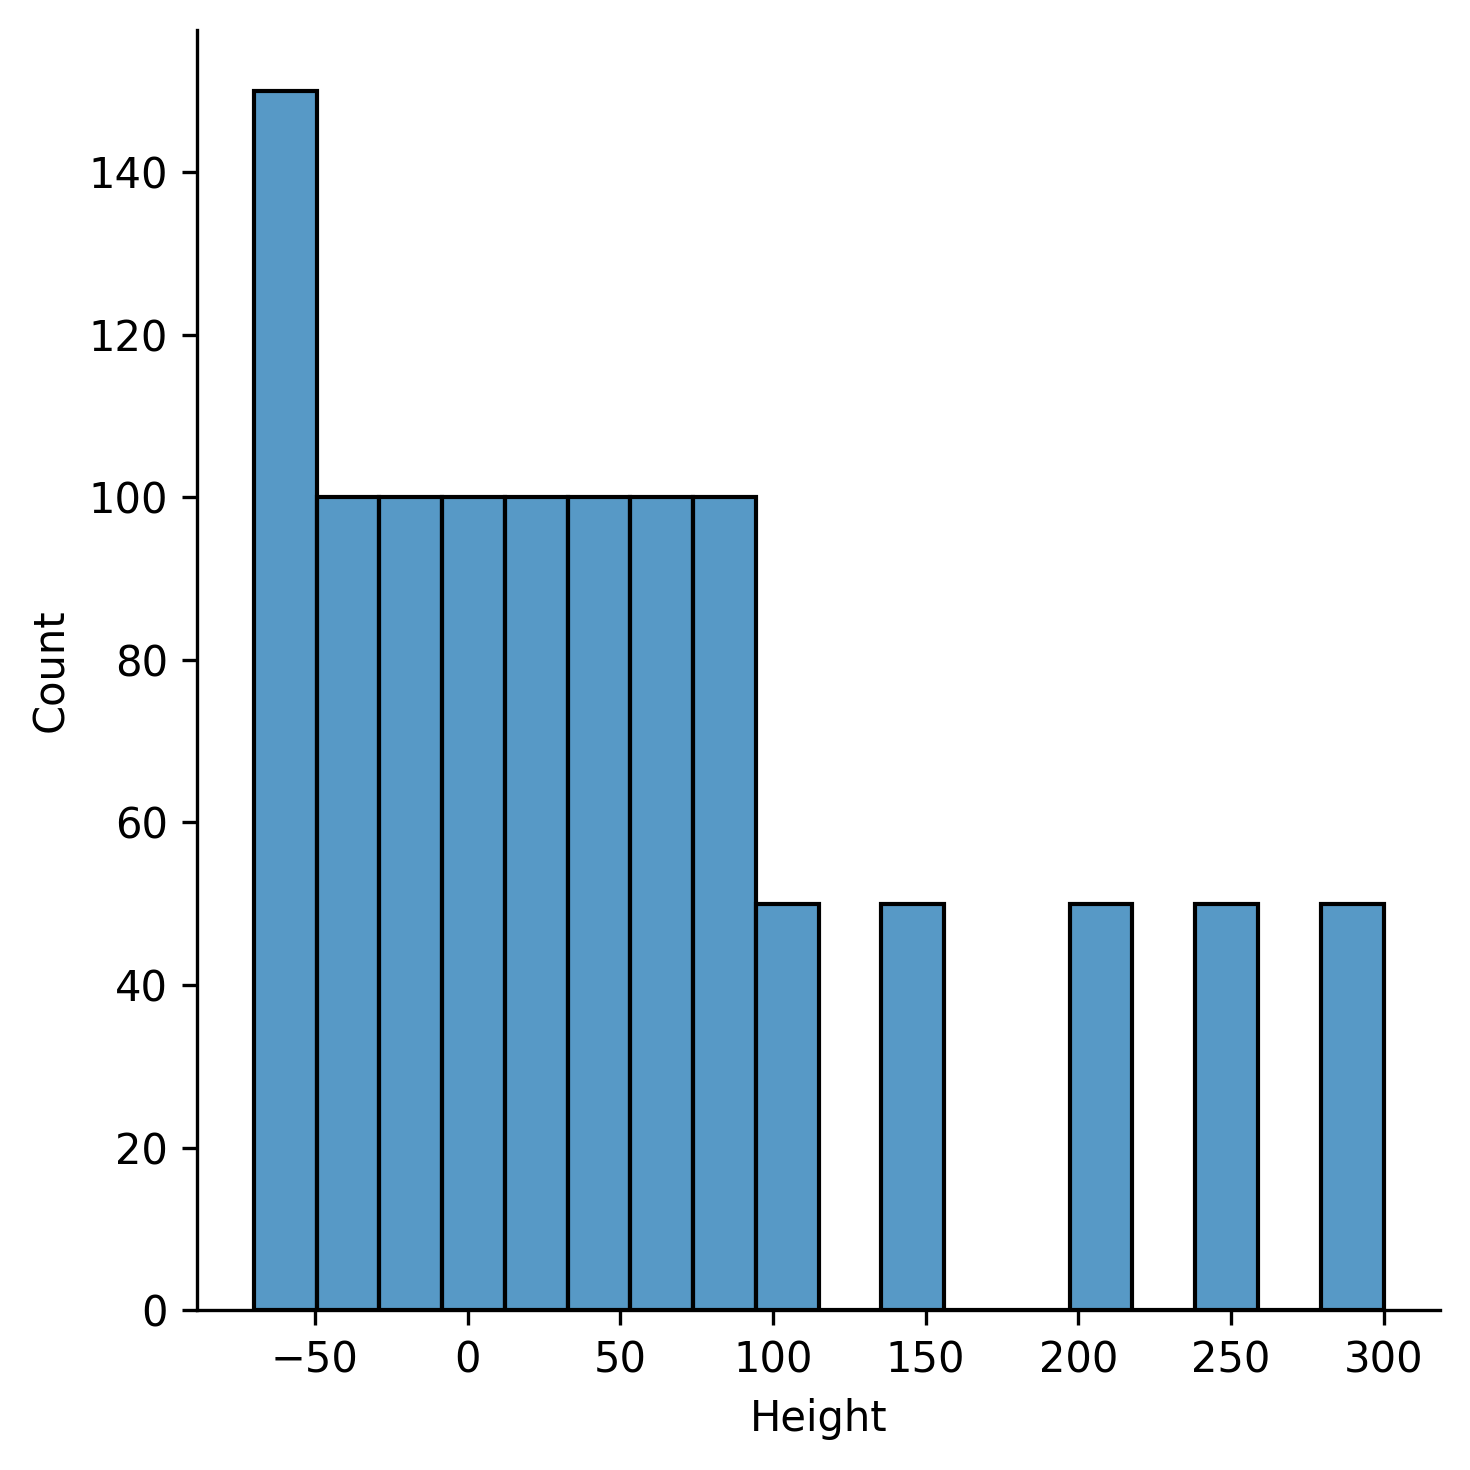

In [38]:
sns.displot(df, x='Height')

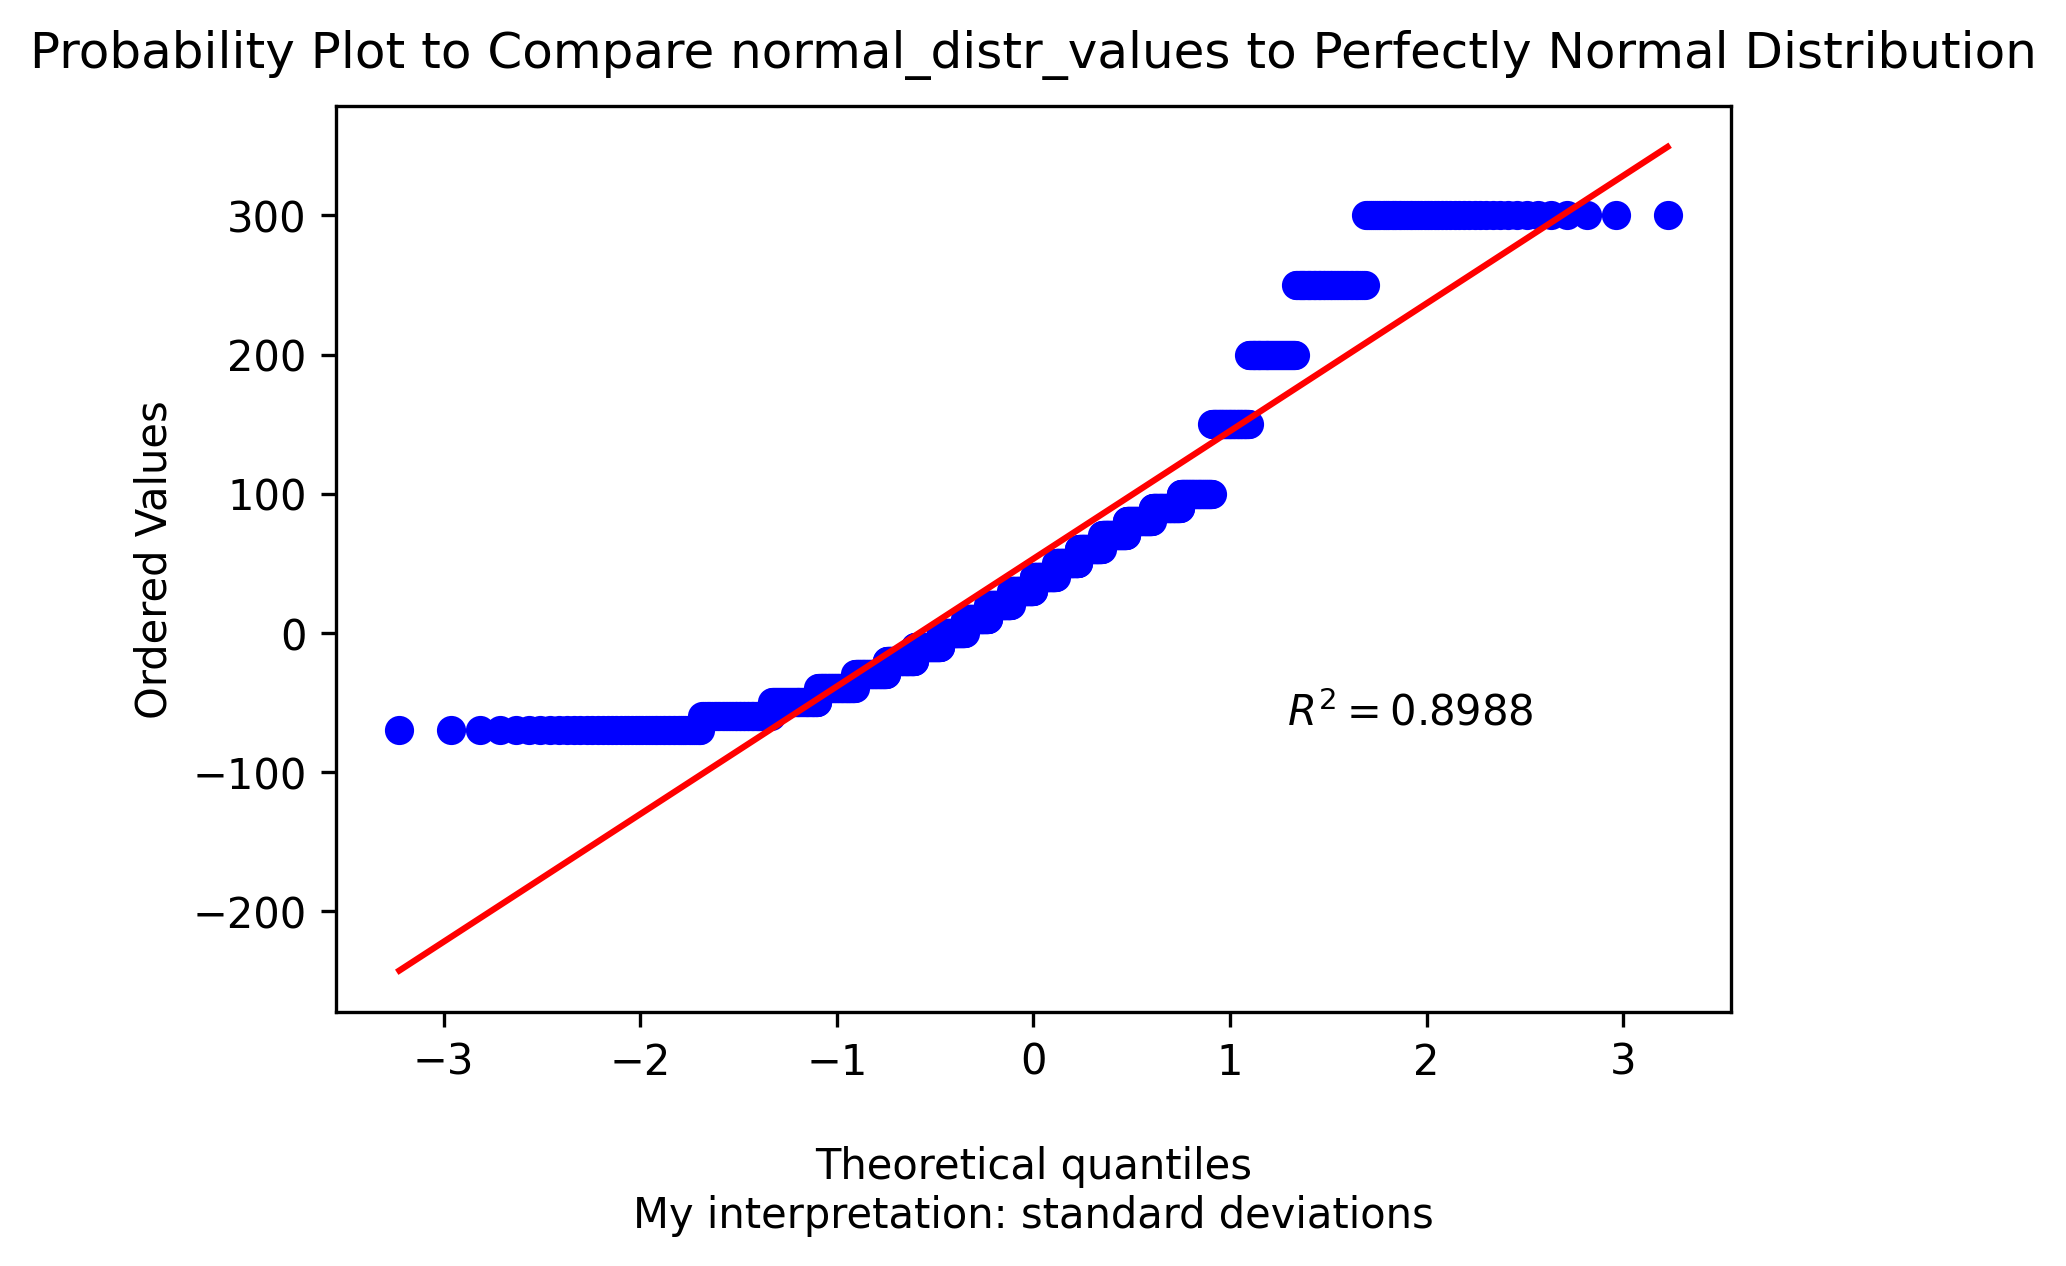

In [39]:
import scipy.stats as stats
stats.probplot(df.loc[:,'Height'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
plt.show()

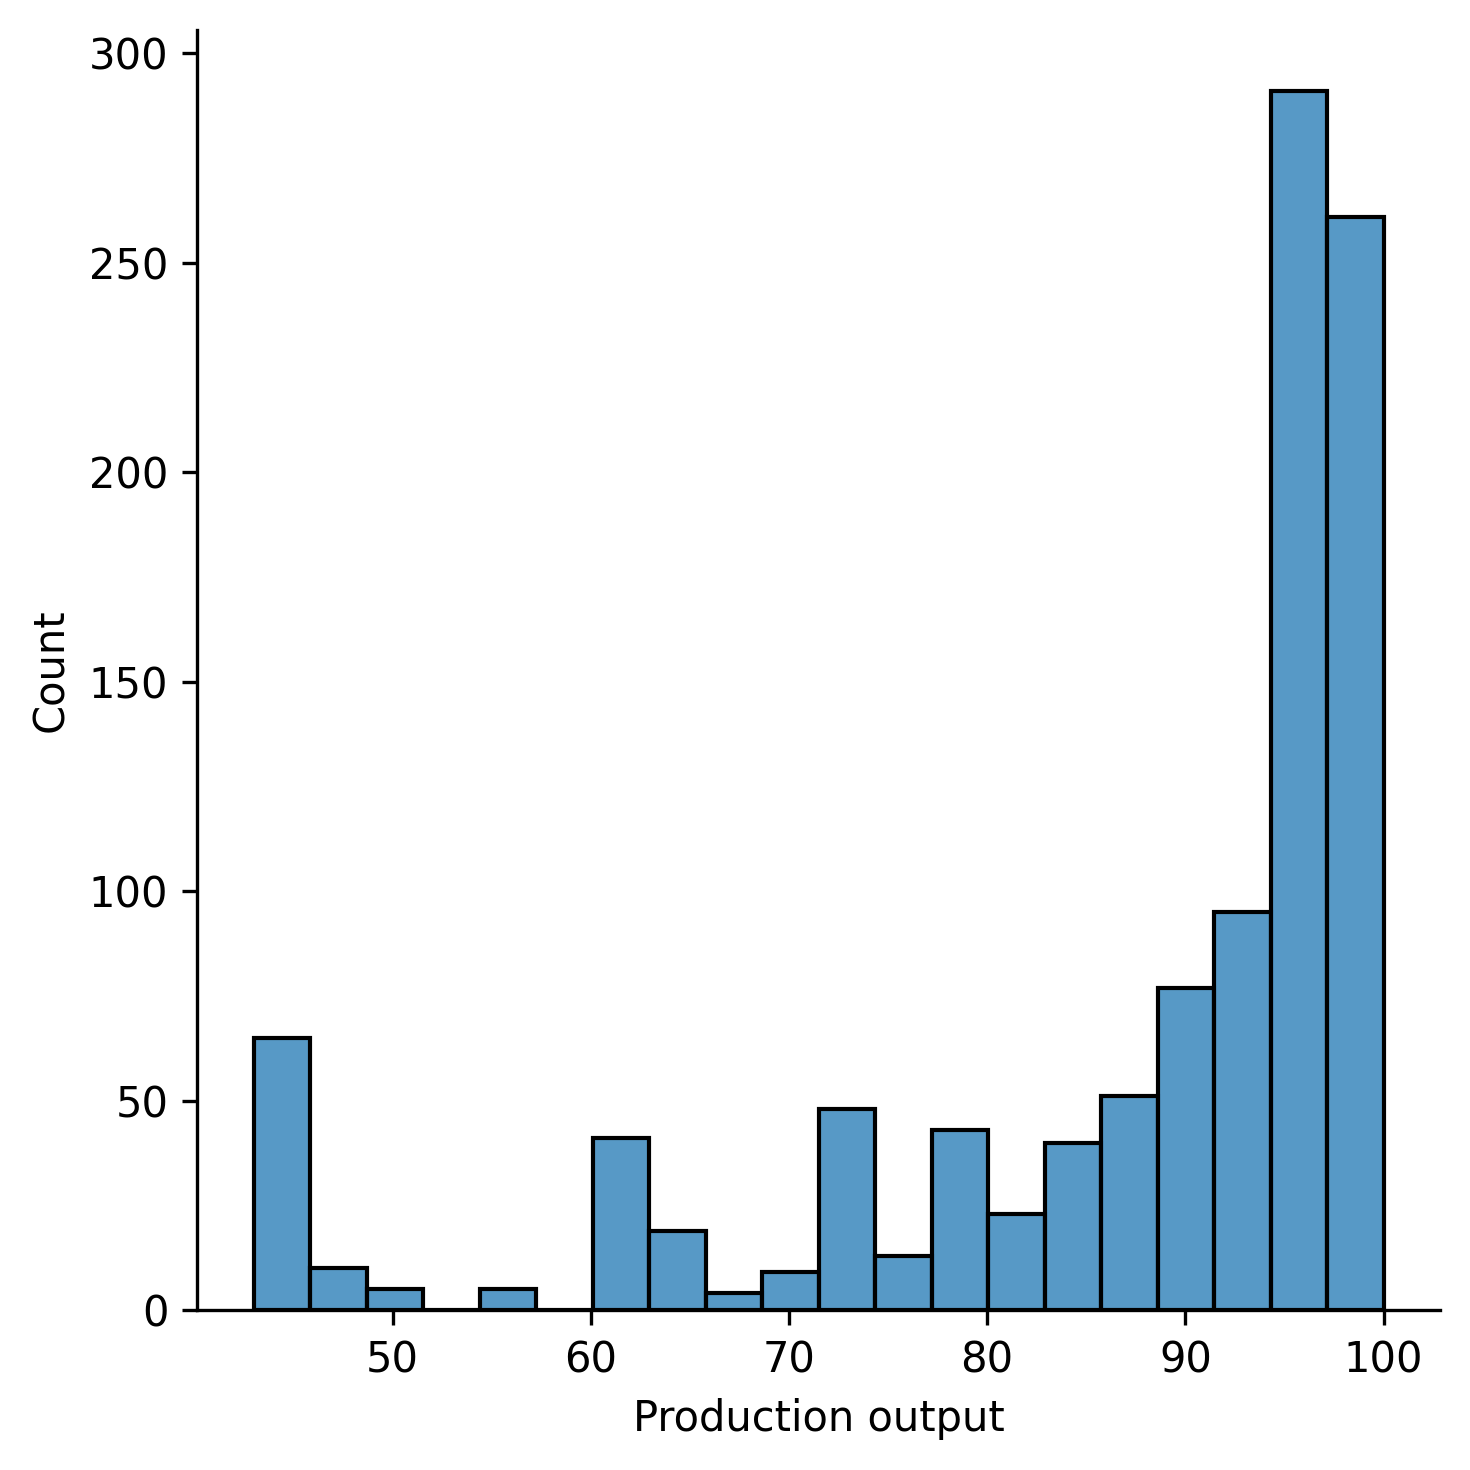

In [40]:
sns.displot(df, x='Production output')

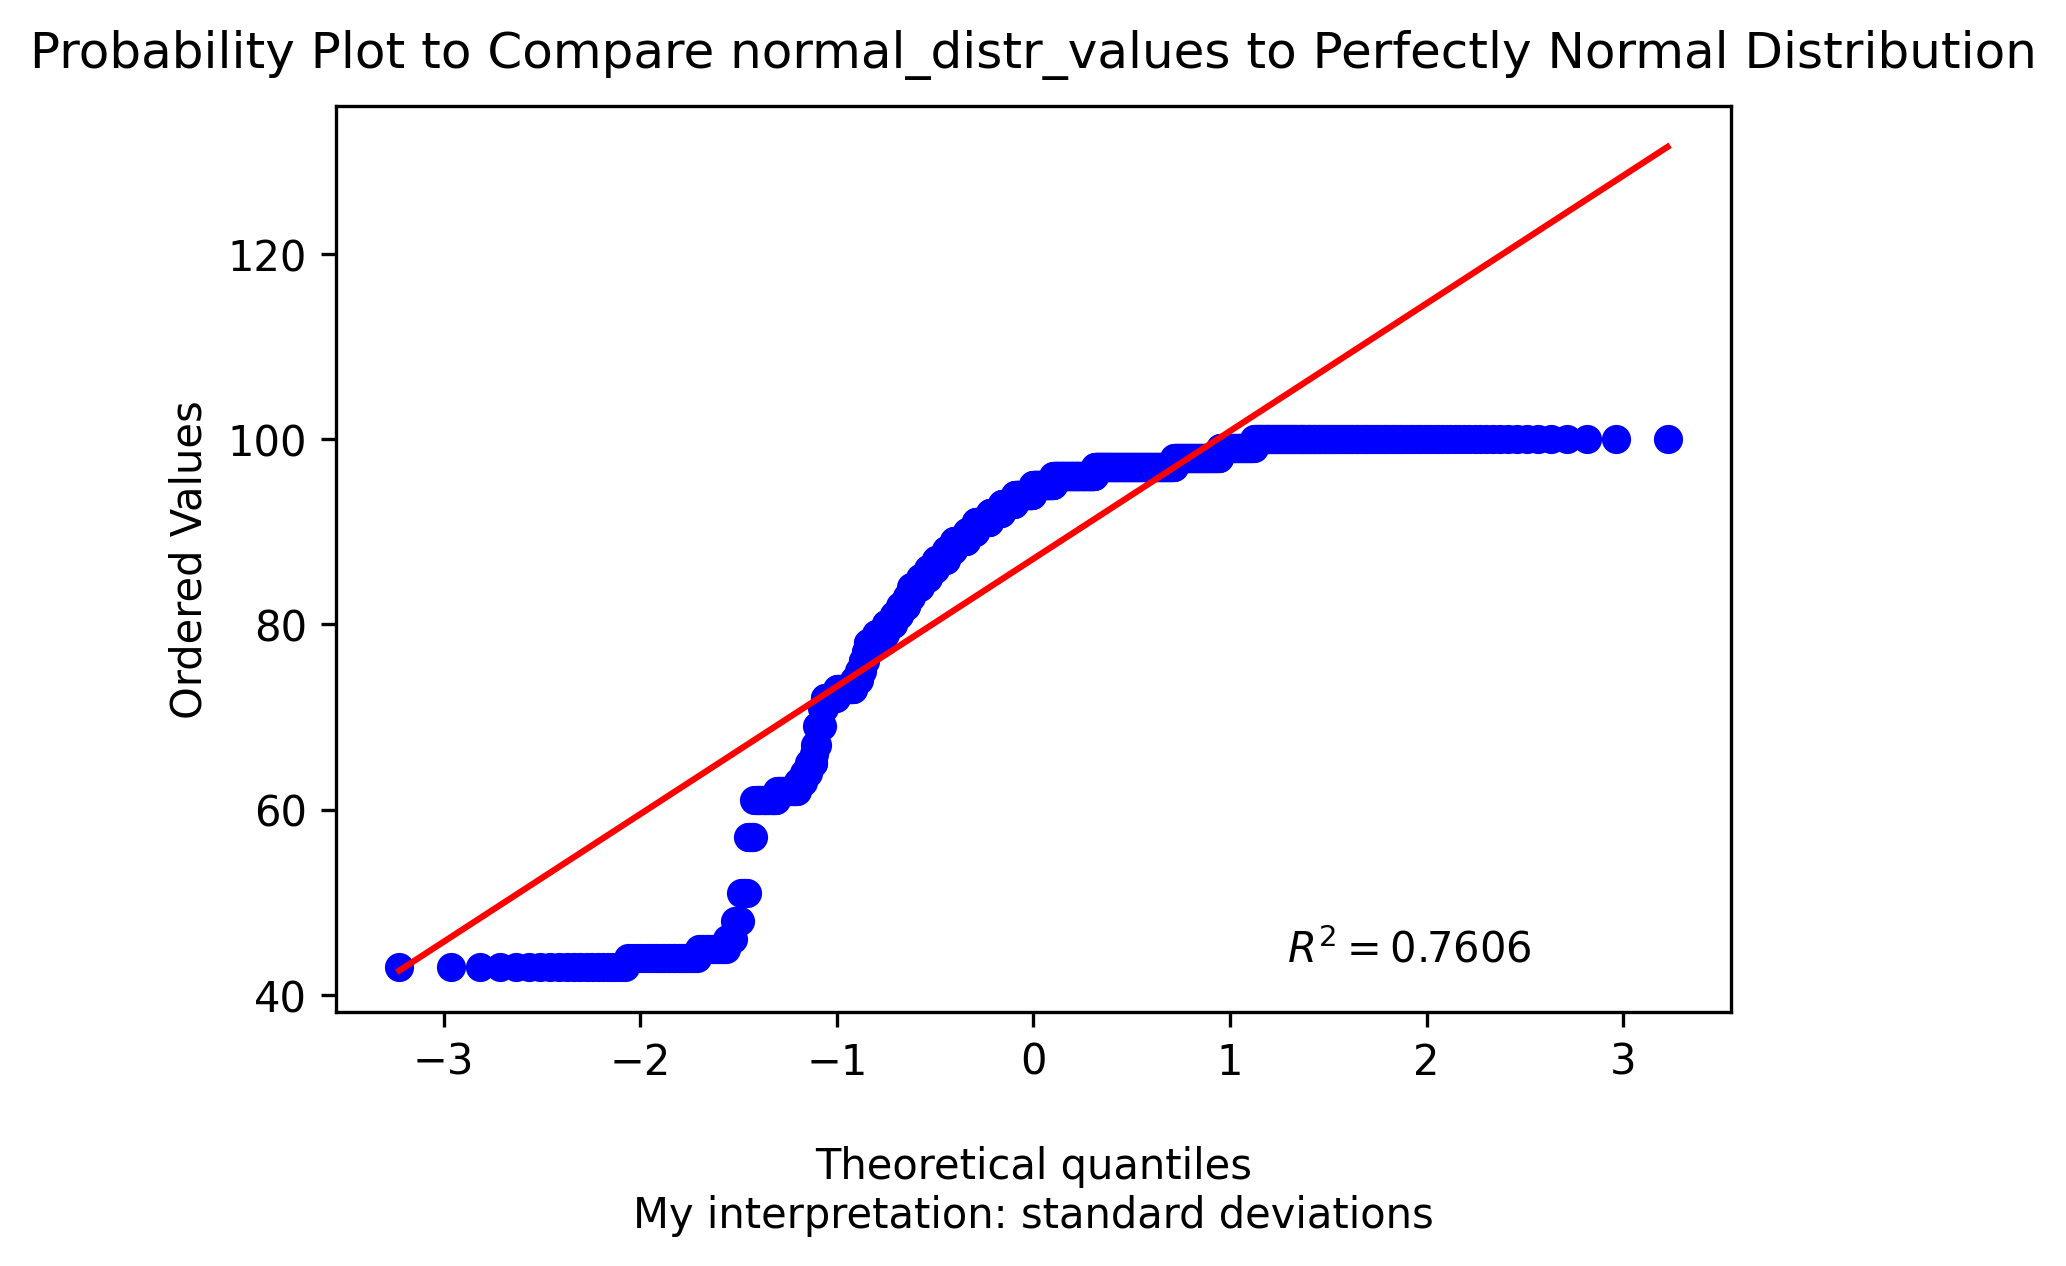

In [41]:
import scipy.stats as stats
stats.probplot(df.loc[:,'Production output'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
plt.show()

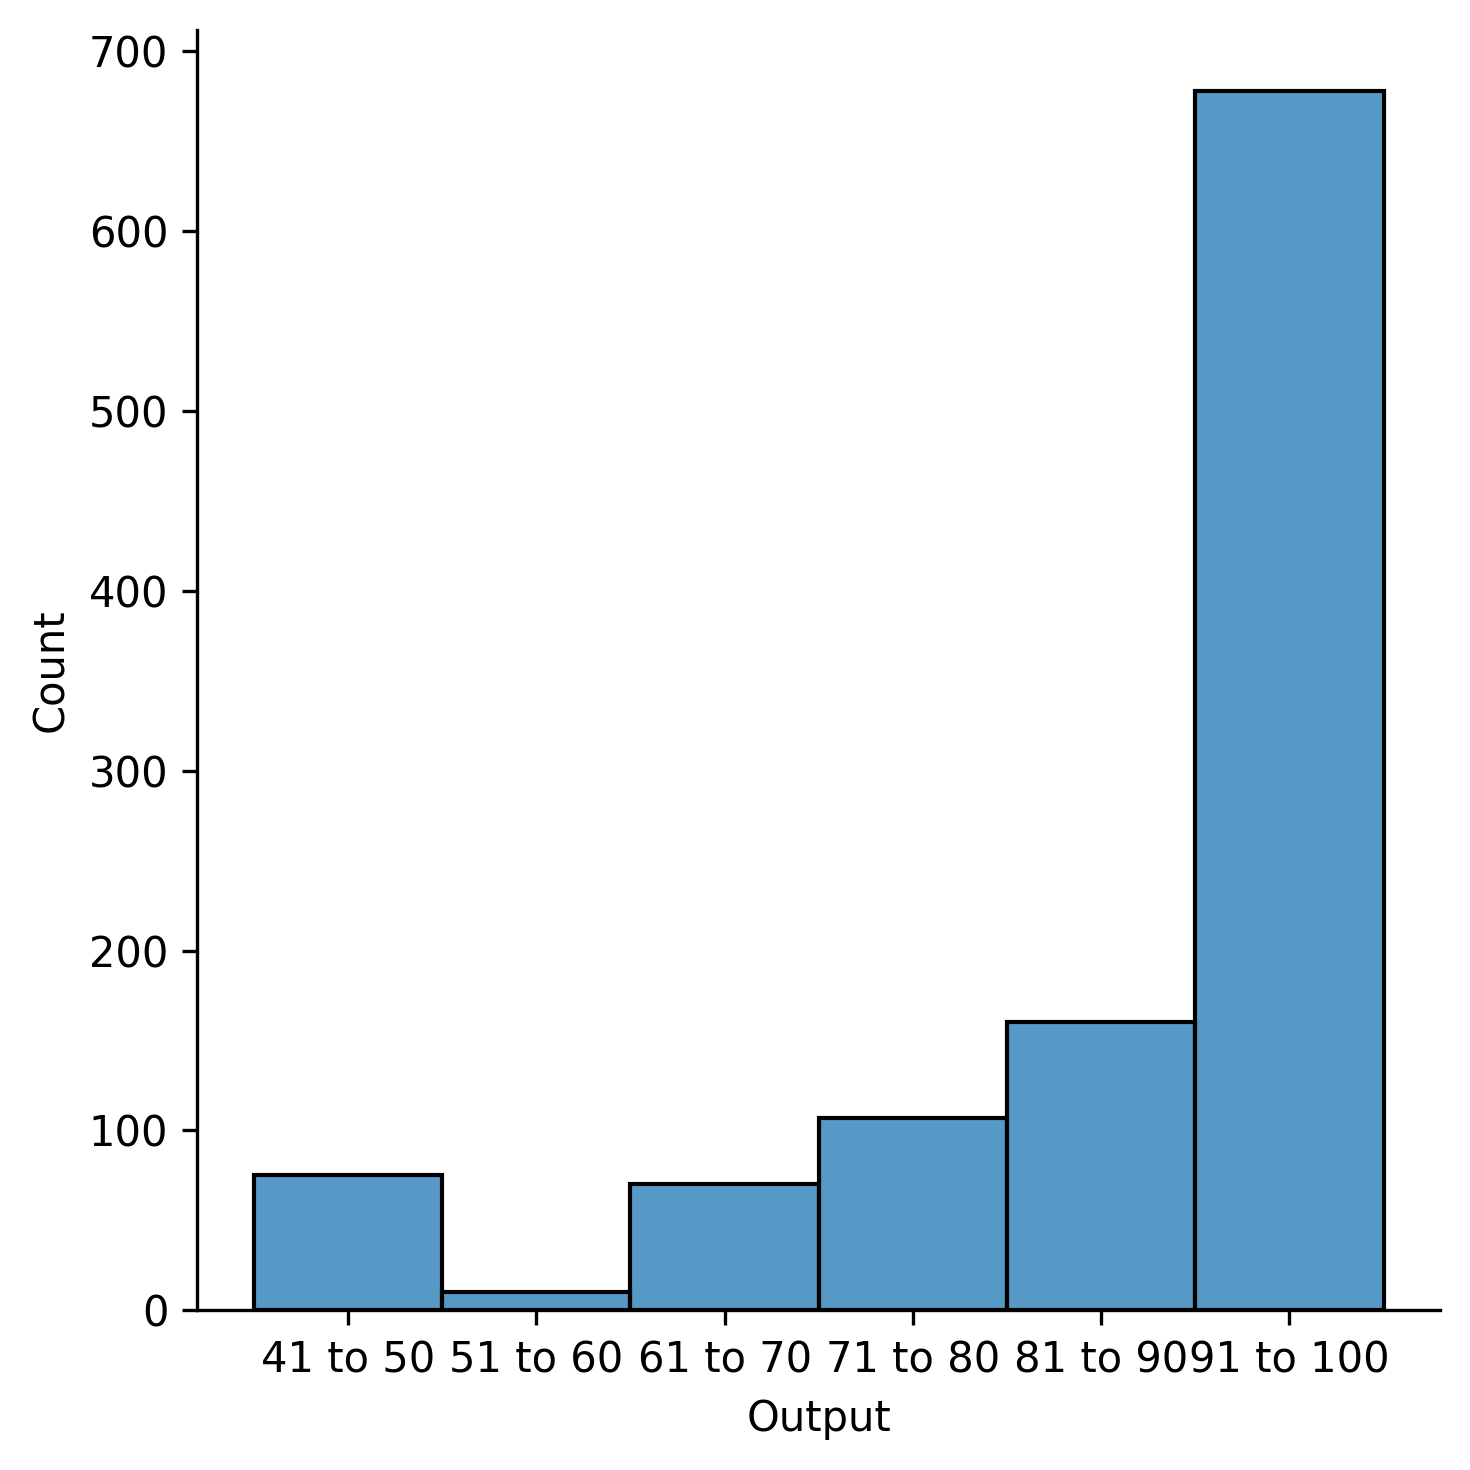

In [42]:
sns.displot(df, x='Output')

## Correlation Plots

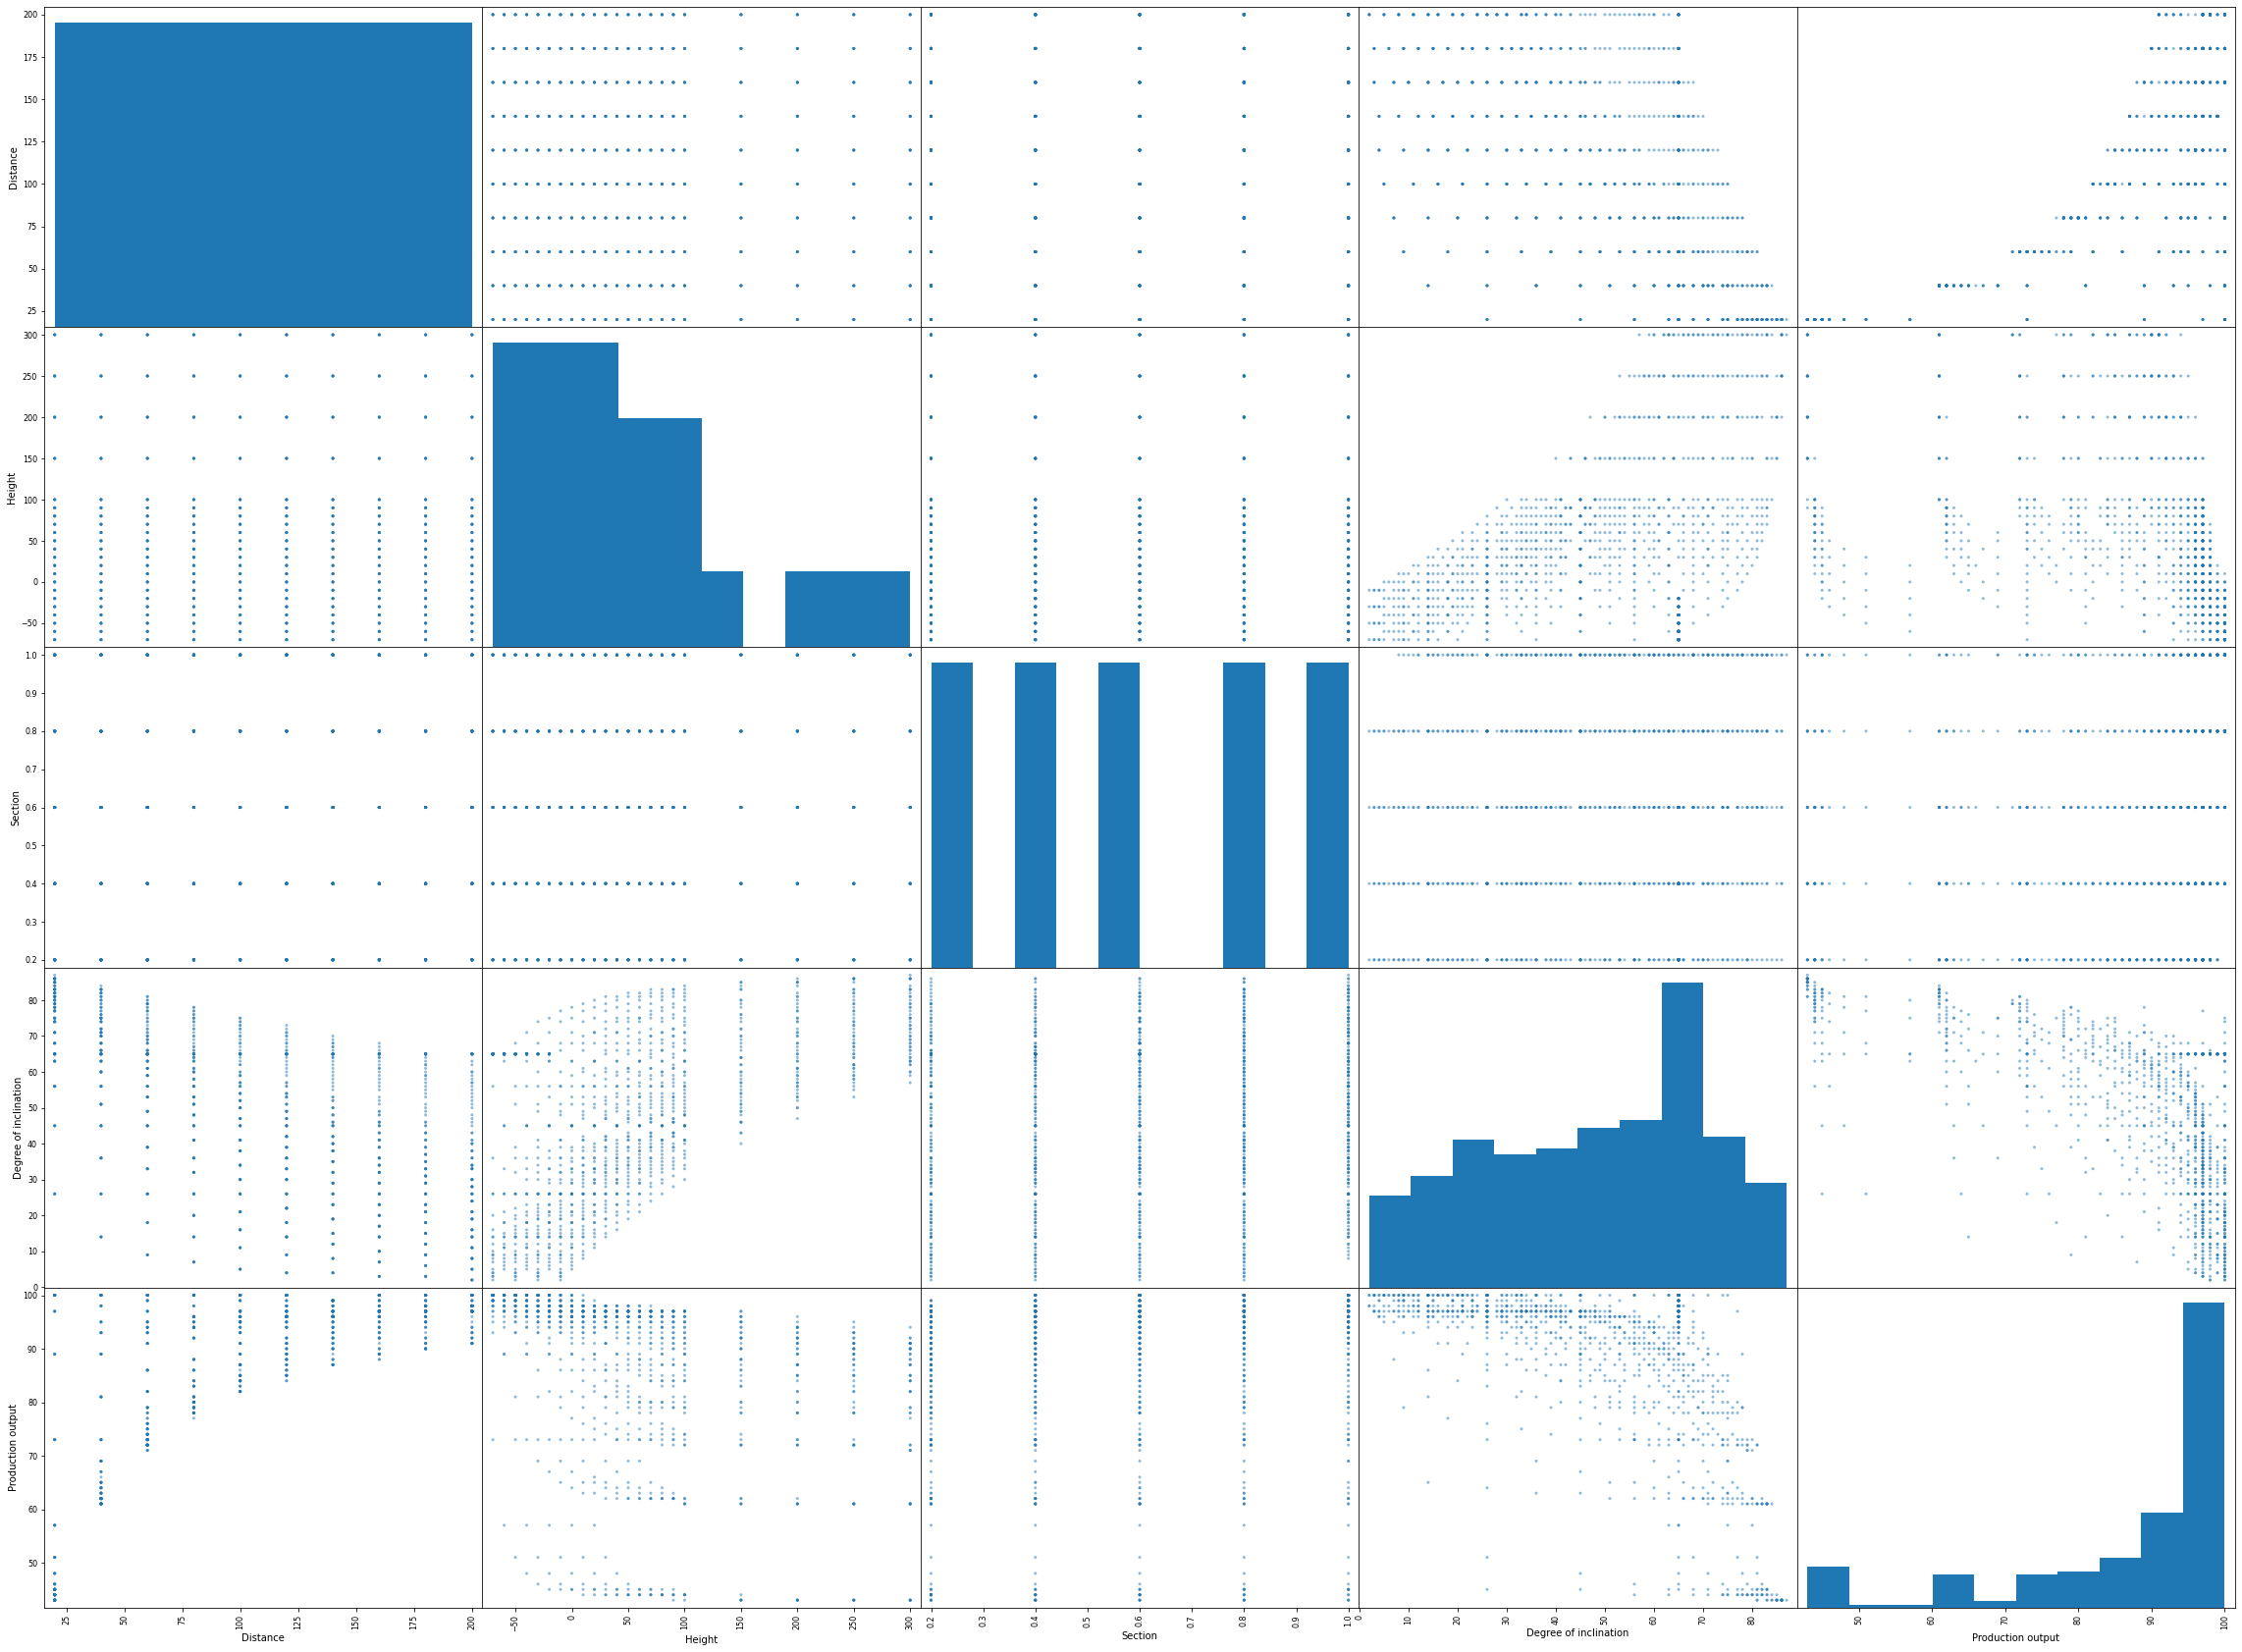

In [12]:
scatter = pd.plotting.scatter_matrix(df, figsize=(40,30),alpha=0.5, grid=True)

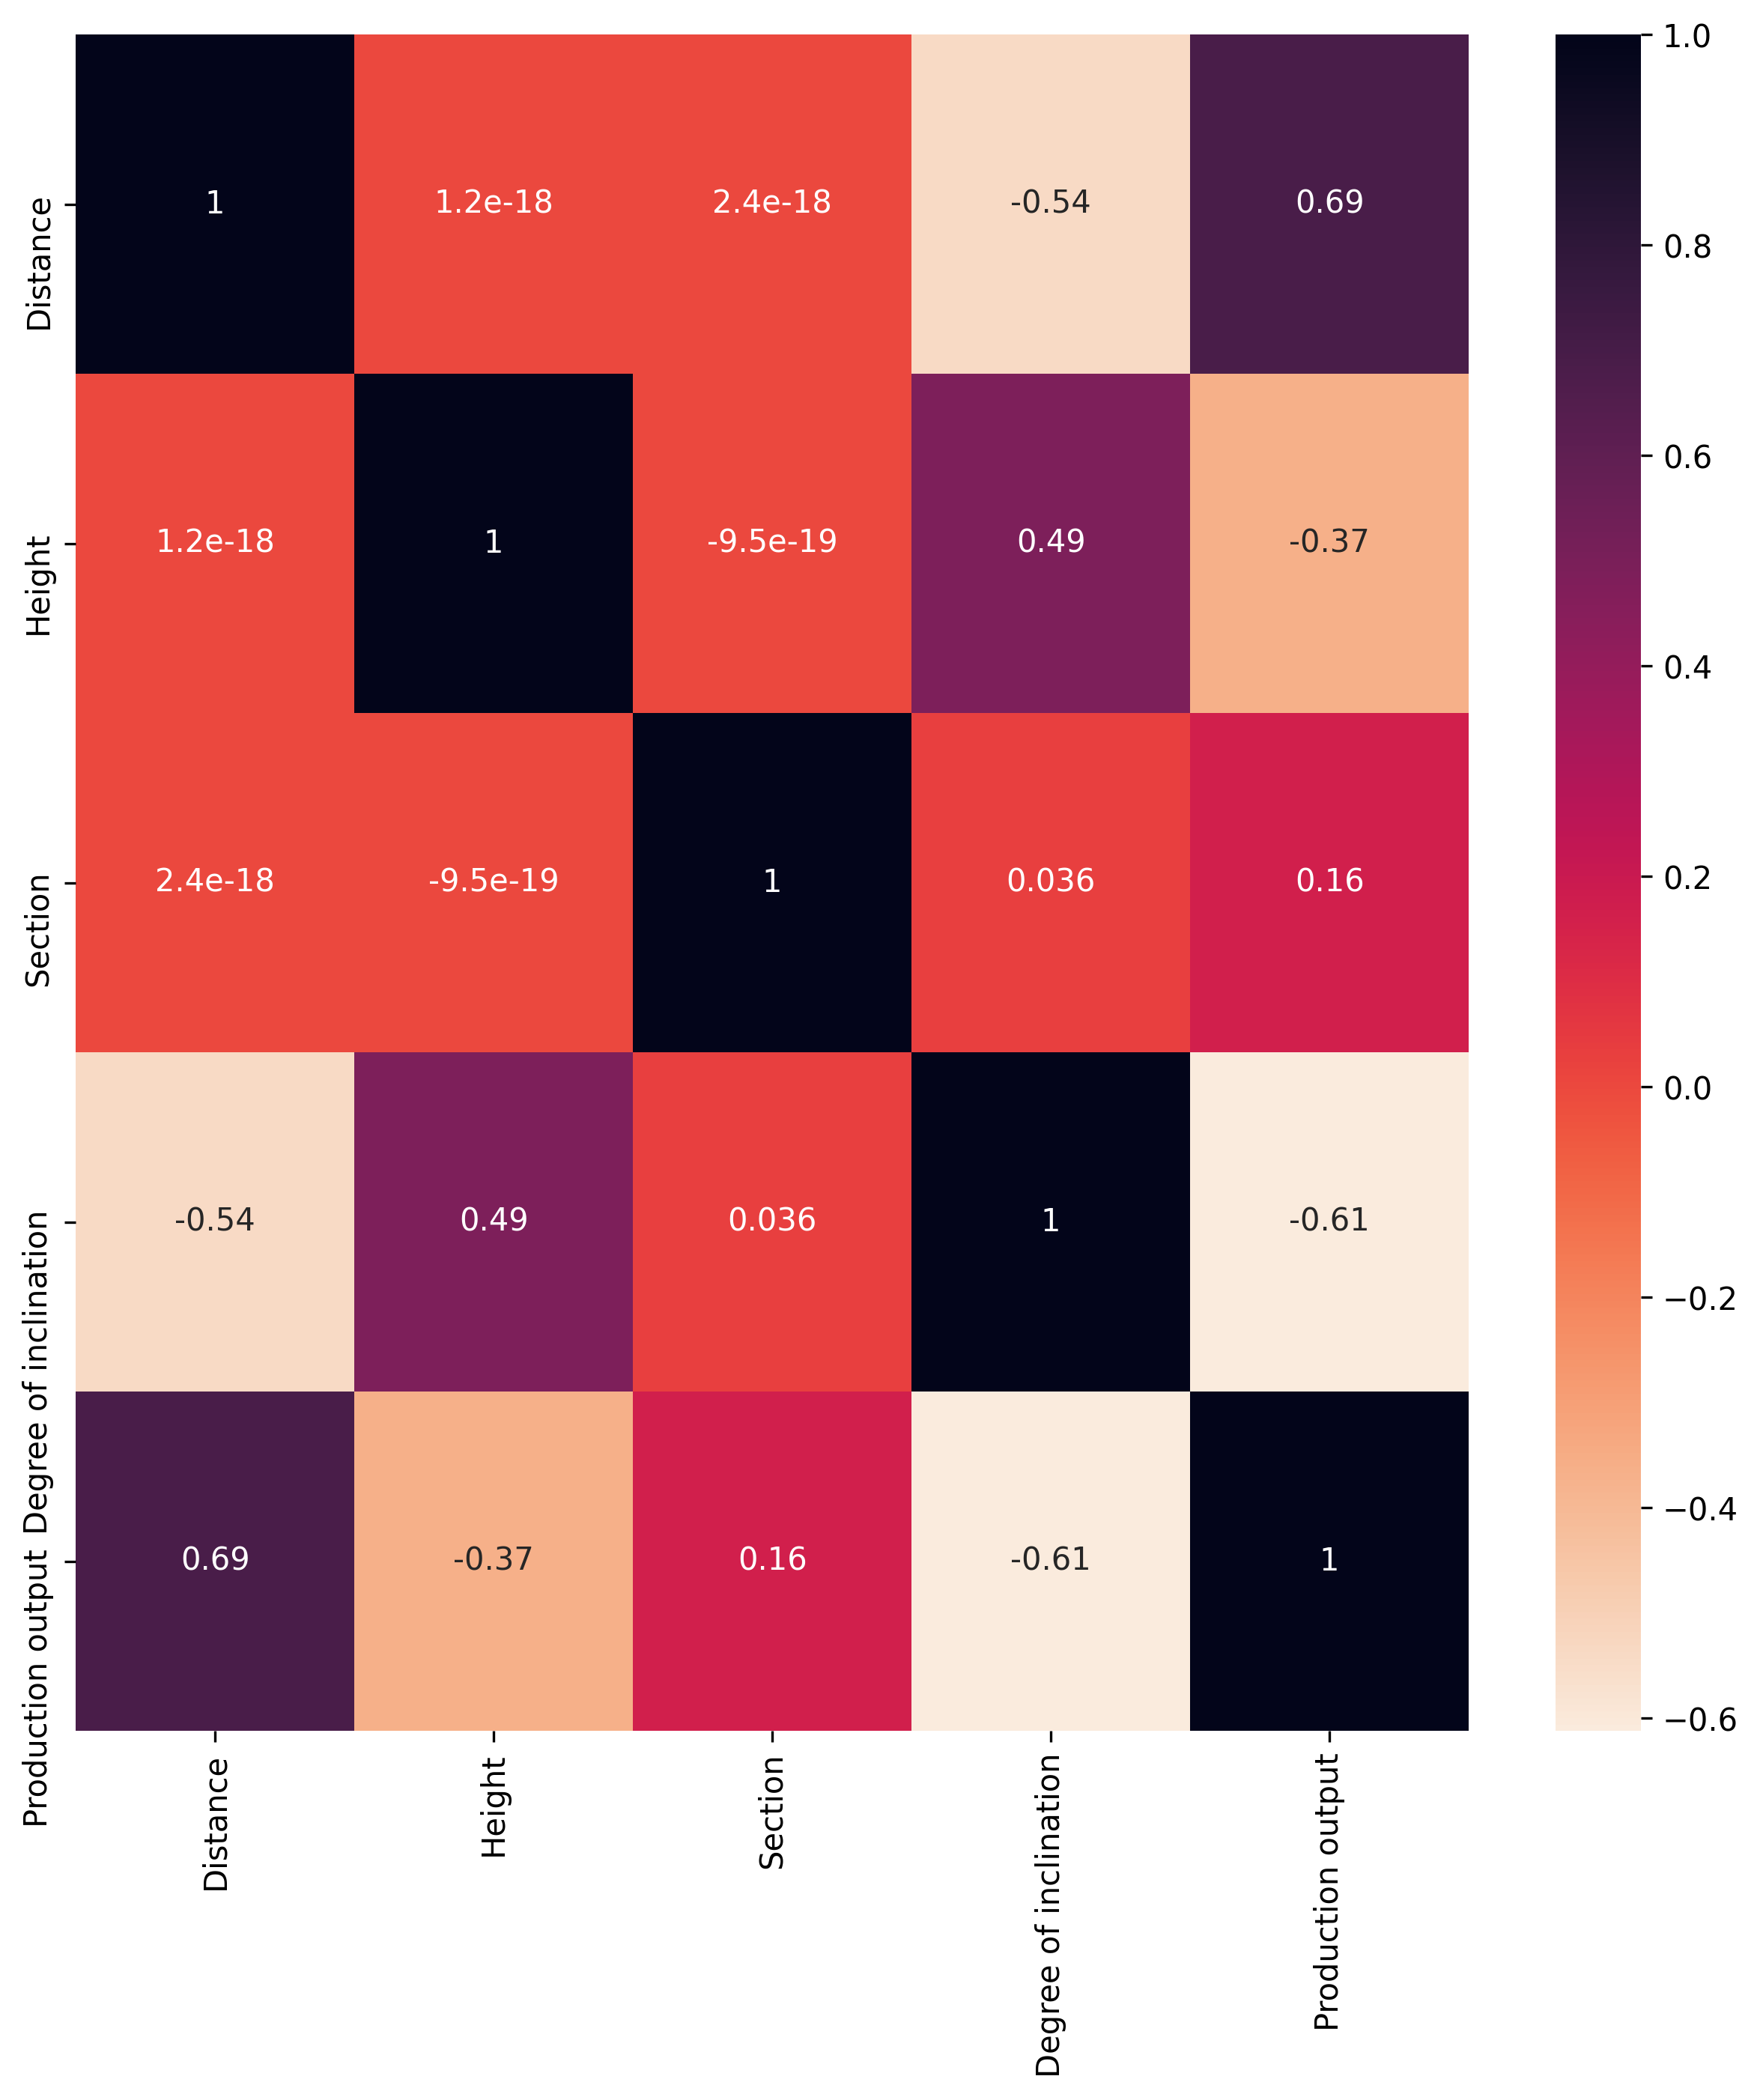

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="rocket_r")

In [49]:
sns.pairplot(df, hue="Output")

Output hidden; open in https://colab.research.google.com to view.

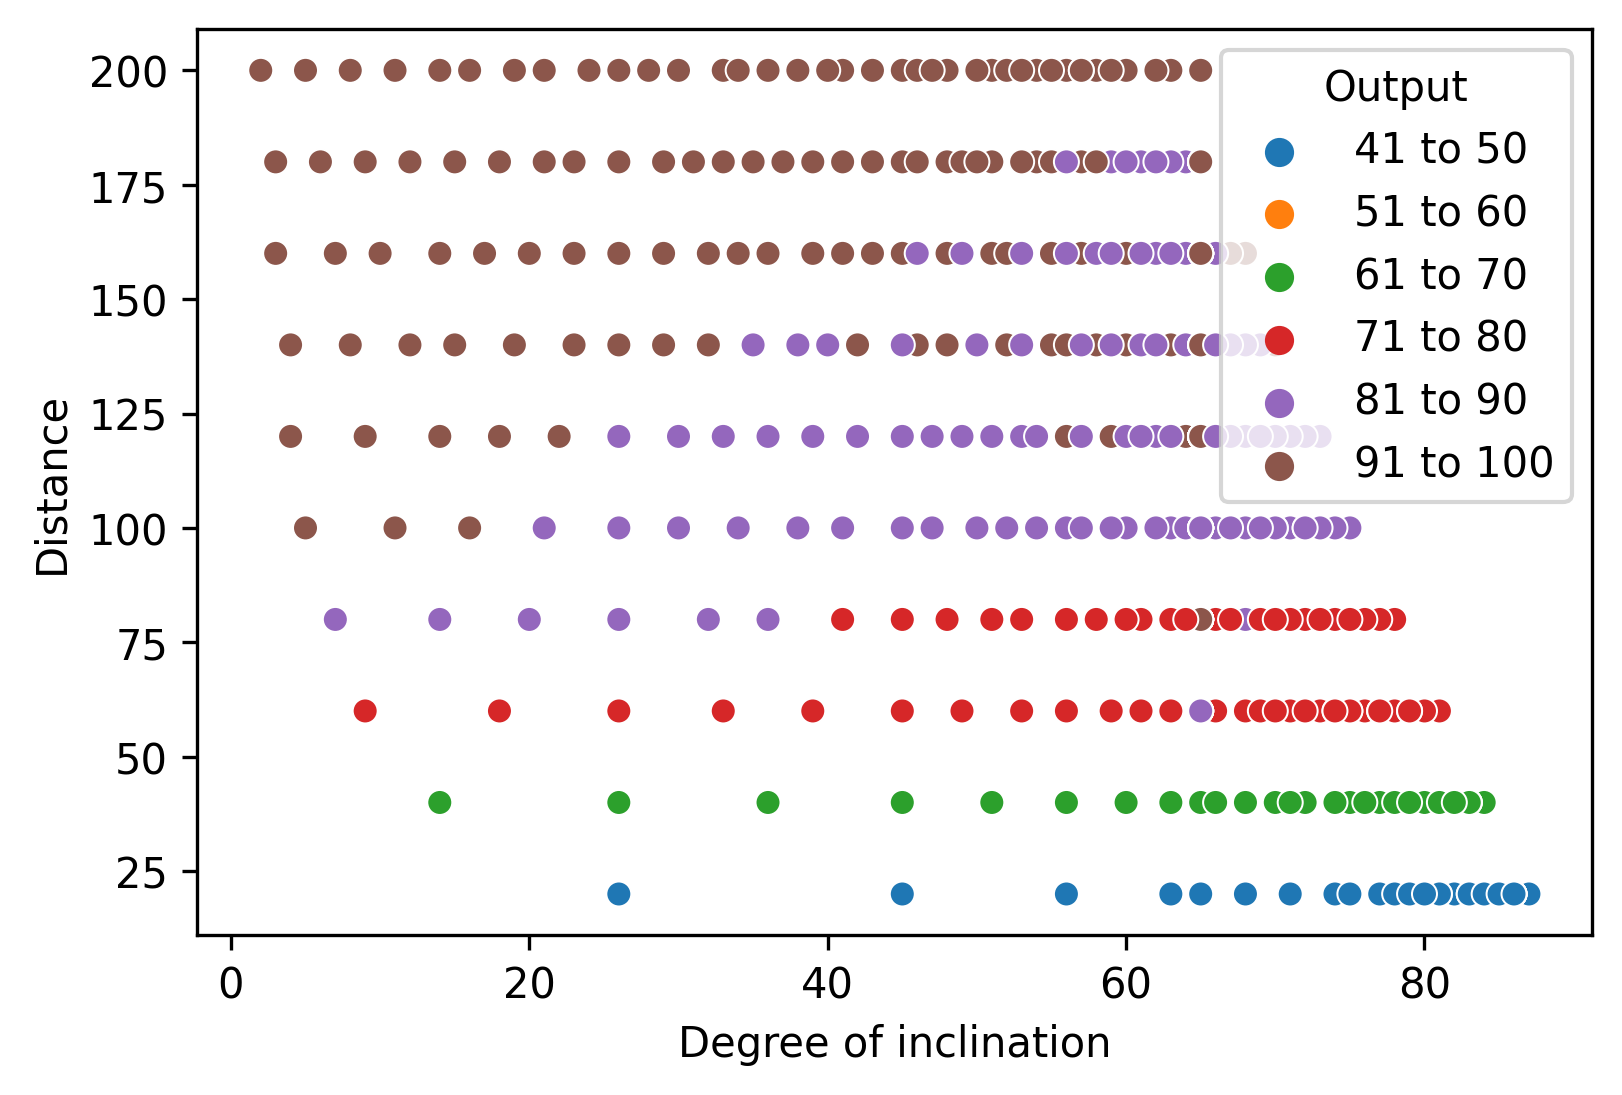

In [50]:
sns.scatterplot(data=df, x="Degree of inclination", y="Distance" , hue="Output")

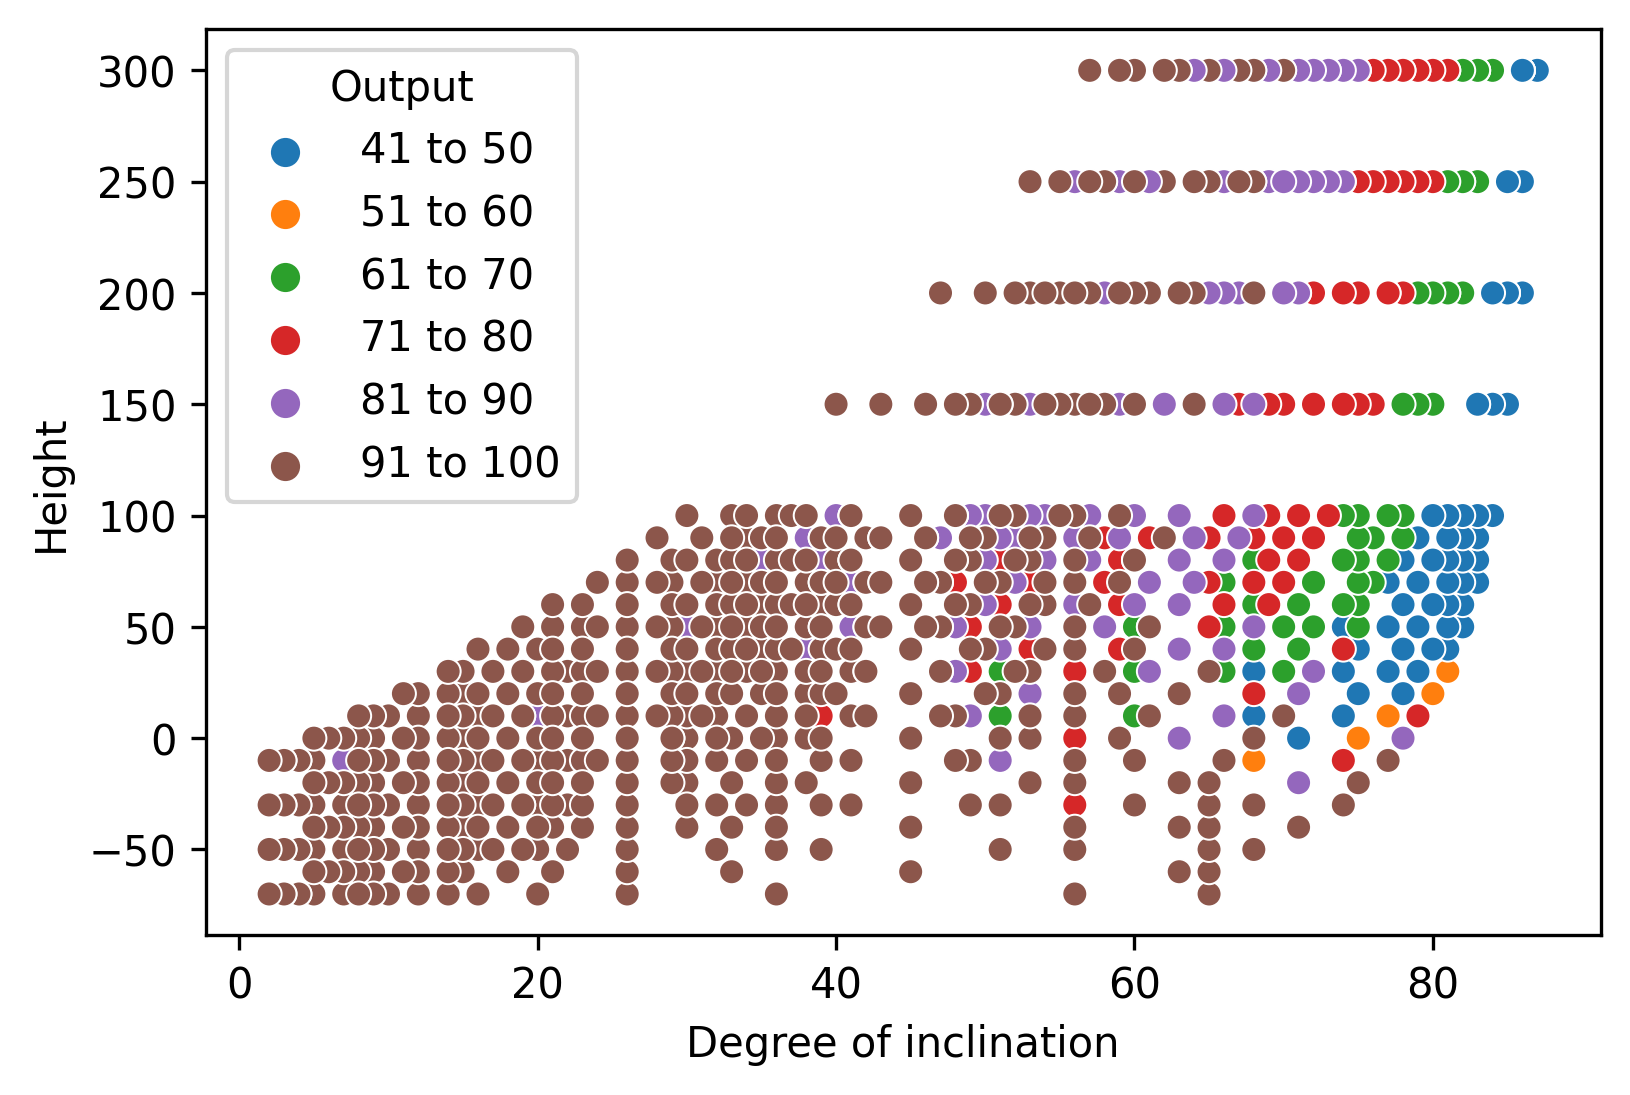

In [51]:
sns.scatterplot(data=df, x="Degree of inclination", y="Height" , hue="Output")

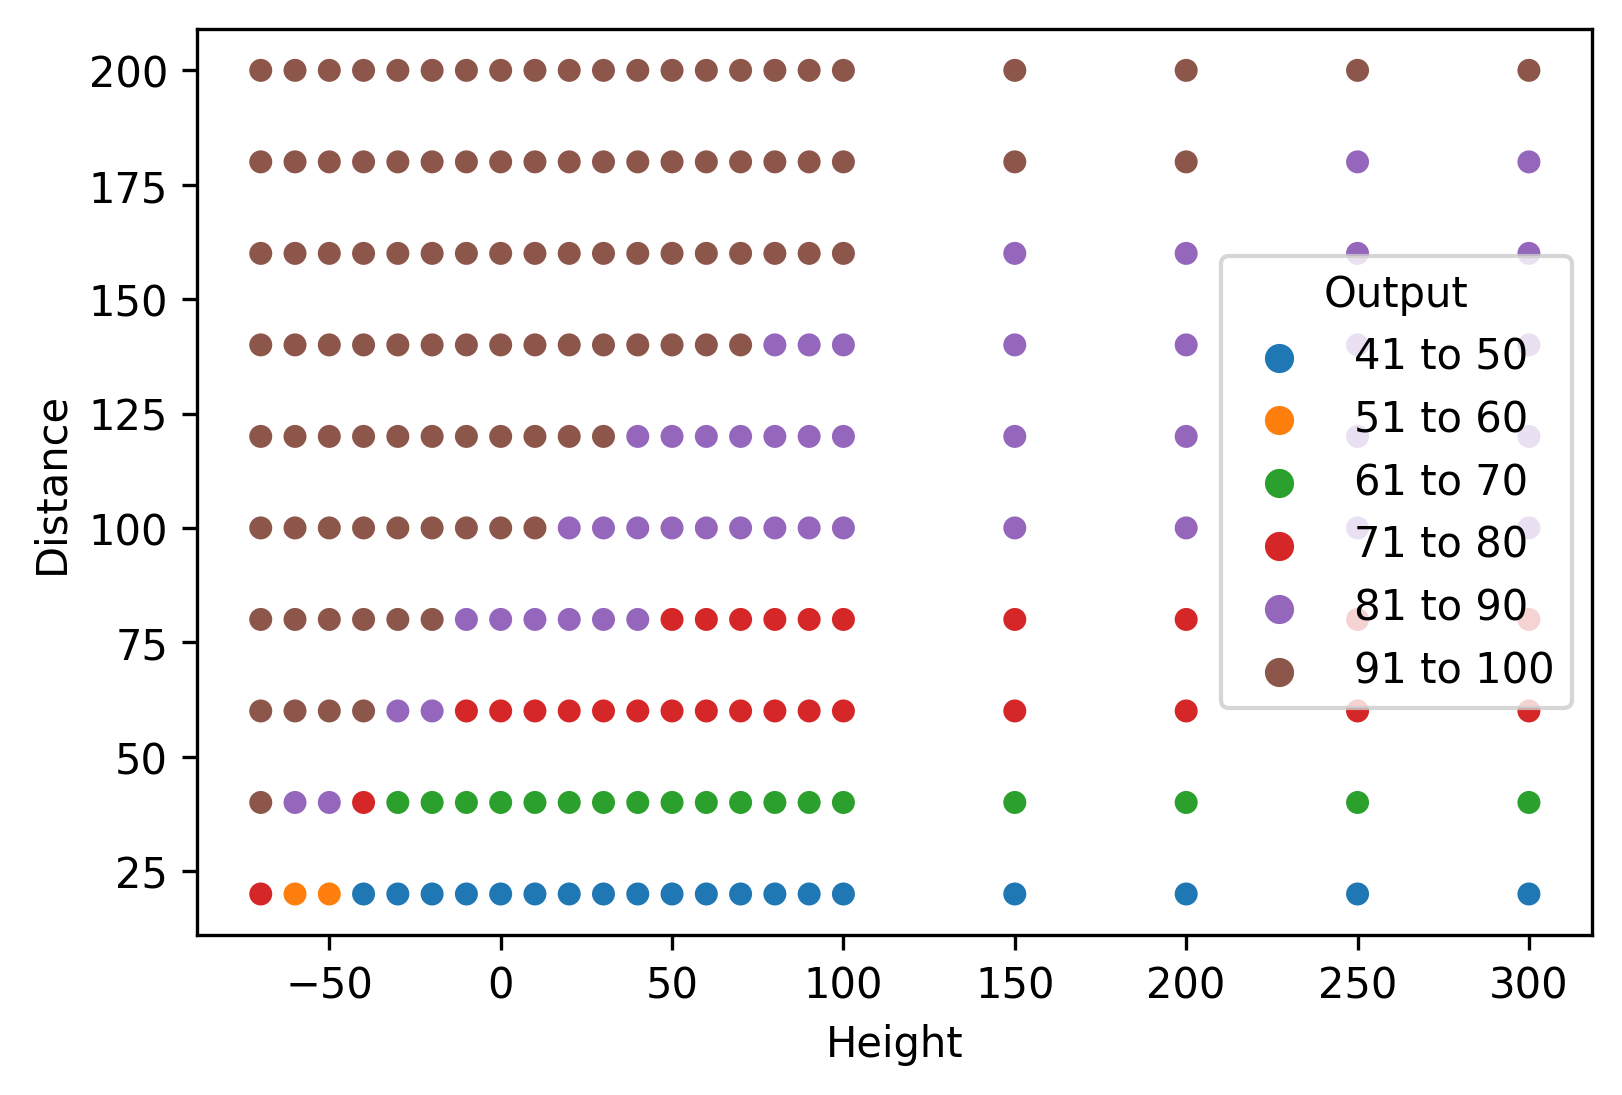

In [52]:
sns.scatterplot(data=df, x="Height", y="Distance" , hue="Output")

# Applying Classification

In [ ]:
X = df[['Degree of inclination','Distance', 'Height', 'Section']]
y = df['Output']

In [ ]:
std = StandardScaler()
# X is a matrix
std.fit(X)
X_std = std.transform(X)

In [ ]:
X.head()

,Degree of inclination,Distance,Height,Section
0,56,20,-70,1.0
1,63,20,-60,1.0
2,68,20,-50,1.0
3,71,20,-40,1.0
4,74,20,-30,1.0


In [ ]:
pd.DataFrame(X_std, columns=['Degree of inclination','Distance', 'Height', 'Section']).head()

,Degree of inclination,Distance,Height,Section
0,0.370656,-1.566699,-1.275227,1.414214
1,0.684149,-1.566699,-1.171703,1.414214
2,0.908074,-1.566699,-1.068179,1.414214
3,1.042428,-1.566699,-0.964655,1.414214
4,1.176783,-1.566699,-0.861131,1.414214


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_std,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
LR.predict(test_x)
#print('LogisticRegression', round(LR.score(test_x,test_y), 4))

SVM = svm.SVC(decision_function_shape="ovo").fit(train_x, train_y)
SVM.predict(test_x)
#print('SVC',round(SVM.score(test_x, test_y), 4))

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(train_x, train_y)
RF.predict(test_x)
#print('RandomForestClassifier',round(RF.score(test_x, test_y), 4))

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(train_x, train_y)
NN.predict(test_x)
#print('MLPClassifier',round(NN.score(test_x, test_y), 4))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array(['71 to 80', '91 to 100', '71 to 80', '91 to 100', '91 to 100',
       '91 to 100', '41 to 50', '91 to 100', '91 to 100', '41 to 50',
       '91 to 100', '51 to 60', '91 to 100', '91 to 100', '71 to 80',
       '81 to 90', '81 to 90', '91 to 100', '81 to 90', '91 to 100',
       '81 to 90', '81 to 90', '91 to 100', '91 to 100', '91 to 100',
       '91 to 100', '91 to 100', '91 to 100', '91 to 100', '91 to 100',
       '91 to 100', '61 to 70', '81 to 90', '81 to 90', '91 to 100',
       '71 to 80', '91 to 100', '81 to 90', '91 to 100', '91 to 100',
       '91 to 100', '91 to 100', '71 to 80', '81 to 90', '91 to 100',
       '91 to 100', '91 to 100', '61 to 70', '91 to 100', '91 to 100',
       '41 to 50', '81 to 90', '71 to 80', '91 to 100', '91 to 100',
       '41 to 50', '81 to 90', '71 to 80', '91 to 100', '61 to 70',
       '91 to 100', '91 to 100', '91 to 100', '91 to 100', '91 to 100',
       '61 to 70', '71 to 80', '91 to 100', '41 to 50', '71 to 80',
       '41 to 50', '41

In [ ]:
print('LogisticRegression', round(LR.score(test_x,test_y), 4))
print('SVC',round(SVM.score(test_x, test_y), 4))
print('RandomForestClassifier',round(RF.score(test_x, test_y), 4))
print('MLPClassifier',round(NN.score(test_x, test_y), 4))

LogisticRegression 0.8409
SVC 0.9182
RandomForestClassifier 0.9182
MLPClassifier 0.9864
